<center><font size="10"><b>DMCyT: Trabajo práctico Nº2</b></font></center>

In [2]:
# Para visualización en notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,8)
mpl.rcParams['font.size'] = 12
import seaborn as sns
sns.set_style("darkgrid")
mpl.style.use('ggplot')

# Números y Datos
import numpy as np
import pandas as pd

# Grafos
import networkx as nx

# Misc
from glob import glob
from pathlib import Path

# Carga de archivos

En la carpeta DataSujetos se encuentran los archivos separados por cada sujeto y estadio del sueño bajo la siguiente notación *[Estadio del sueño]_[Número de sujeto].csv*. Además se incluyen los nombres de las 116 regiones en un archivo aparte: *aal_extended.csv*.

In [ ]:
"""
# Para levantar cada archivo de a uno
# Listado de archivos en el directorio
filenames = glob('DataSujetos/*.csv')

# Se carga el primer archivo (0)
df = pd.read_csv(filenames[0], header=None)

# Cantidad de registros/columnas (son matrices cuadradas)
n = df.shape[0]

# Le resta 1 a cada elemento de la diagonal para dejarlos en 0
df -= np.diag(np.ones(n))
"""

## Matriz promedio del estadio W

In [10]:
# Listado de archivos en el directorio
files_w = glob('DataSujetos/W*.csv')

# Agrega una columna con el nombre del archivo
filename = (pd.read_csv(f, header=None).assign(filename=f.split(".")[0].split("\\")[1]) for f in files_w)

# Concatena todos los dataframes
df_w = pd.concat(filename, ignore_index=False, sort=False)

# Calcula el promedio para cada celda
df_w = df_w.groupby(df_w.index).mean()

# Cantidad de registros/columnas (son matrices cuadradas)
n = df_w.shape[0]

# Le resta 1 a cada elemento de la diagonal para dejarlos en 0
df_w -= np.diag(np.ones(n))

In [3]:
df_w

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,115
0,0.000000,0.875693,0.640179,0.620273,0.537648,0.519712,0.690205,0.676957,0.527809,0.520827,...,0.339597,0.309208,0.301516,0.484094,0.527805,0.512767,0.438433,0.481611,0.413802,0.188360
1,0.875693,0.000000,0.585738,0.614653,0.510480,0.498704,0.611273,0.656663,0.472469,0.486394,...,0.343168,0.277429,0.297501,0.458859,0.508864,0.495661,0.400285,0.468672,0.374851,0.200169
2,0.640179,0.585738,0.000000,0.844262,0.725156,0.665421,0.882303,0.741961,0.703934,0.632967,...,0.312373,0.302109,0.224536,0.370564,0.464608,0.443559,0.447182,0.440531,0.399424,0.225343
3,0.620273,0.614653,0.844262,0.000000,0.667408,0.716342,0.815525,0.872932,0.647669,0.697648,...,0.312909,0.302212,0.215305,0.340608,0.439723,0.422491,0.408170,0.414304,0.389722,0.215749
4,0.537648,0.510480,0.725156,0.667408,0.000000,0.769444,0.720525,0.637168,0.800874,0.720201,...,0.259528,0.263289,0.163236,0.269284,0.406316,0.388903,0.399041,0.381786,0.299067,0.138788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.512767,0.495661,0.443559,0.422491,0.388903,0.388923,0.471486,0.487721,0.372629,0.308216,...,0.520715,0.543369,0.442454,0.568774,0.852324,0.000000,0.795919,0.720990,0.645444,0.211643
112,0.438433,0.400285,0.447182,0.408170,0.399041,0.371305,0.491558,0.465082,0.387424,0.332002,...,0.487677,0.492058,0.383938,0.494833,0.716088,0.795919,0.000000,0.752909,0.628123,0.187033
113,0.481611,0.468672,0.440531,0.414304,0.381786,0.381877,0.446270,0.459546,0.377202,0.327490,...,0.506120,0.503752,0.427931,0.519505,0.694063,0.720990,0.752909,0.000000,0.749758,0.303311
114,0.413802,0.374851,0.399424,0.389722,0.299067,0.298332,0.403724,0.430885,0.308250,0.244012,...,0.498401,0.547978,0.412334,0.489050,0.651508,0.645444,0.628123,0.749758,0.000000,0.355704


## Matriz promedio del estadio N1

In [11]:
# Listado de archivos en el directorio
files_n1 = glob('DataSujetos/N1*.csv')

# Agrega una columna con el nombre del archivo
filename = (pd.read_csv(f, header=None).assign(filename=f.split(".")[0].split("\\")[1]) for f in files_n1)

# Concatena todos los dataframes
df_n1 = pd.concat(filename, ignore_index=False, sort=False)

# Calcula el promedio para cada celda
df_n1 = df_n1.groupby(df_n1.index).mean()

# Cantidad de registros/columnas (son matrices cuadradas)
n = df_n1.shape[0]

# Le resta 1 a cada elemento de la diagonal para dejarlos en 0
df_n1 -= np.diag(np.ones(n))

In [ ]:
df_n1

## Matriz promedio del estadio N2

In [12]:
# Listado de archivos en el directorio
files_n2 = glob('DataSujetos/N2*.csv')

# Agrega una columna con el nombre del archivo
filename = (pd.read_csv(f, header=None).assign(filename=f.split(".")[0].split("\\")[1]) for f in files_n2)

# Concatena todos los dataframes
df_n2 = pd.concat(filename, ignore_index=False, sort=False)

# Calcula el promedio para cada celda
df_n2 = df_n2.groupby(df_n2.index).mean()

# Cantidad de registros/columnas (son matrices cuadradas)
n = df_n2.shape[0]

# Le resta 1 a cada elemento de la diagonal para dejarlos en 0
df_n2 -= np.diag(np.ones(n))

In [ ]:
df_n2

## Matriz promedio del estadio N3

In [13]:
# Listado de archivos en el directorio
files_n3 = glob('DataSujetos/N3*.csv')

# Agrega una columna con el nombre del archivo
filename = (pd.read_csv(f, header=None).assign(filename=f.split(".")[0].split("\\")[1]) for f in files_n3)

# Concatena todos los dataframes
df_n3 = pd.concat(filename, ignore_index=False, sort=False)

# Calcula el promedio para cada celda
df_n3 = df_n3.groupby(df_n3.index).mean()

# Cantidad de registros/columnas (son matrices cuadradas)
n = df_n3.shape[0]

# Le resta 1 a cada elemento de la diagonal para dejarlos en 0
df_n3 -= np.diag(np.ones(n))

In [ ]:
df_n3

# Tarea 1: Visualización

A partir de los datos individuales, visualizar la estructura de las redes pesadas a partir de los datos promedio para cada estadío del sueño (despierto -W- y N1, N2, N3).  Transformar el grafo pesado de los datos promedio en uno no pesado manteniendo constante la densidad de aristas (δ). Sobre los datos promedio, extraer medidas de centralidad, grado, camino mínimo, y coeficiente de clustering en función de la densidad de aristas (δ). Visualizar el grafo no pesado para distintos valores de δ que resulten interesantes.

## Grafos pesados de los datos promedio

Text(0.5, 1, 'N3')

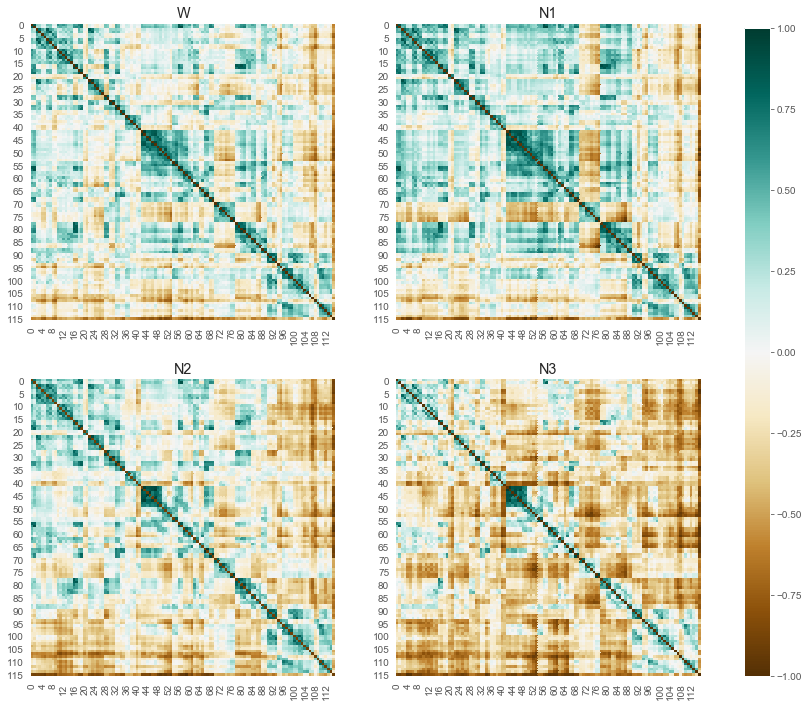

In [307]:
# Se arma una grilla de 2x2
fig, axes = plt.subplots(2, 2, figsize = (12,12) )

# Se define la barra de referencia
cb_ax = fig.add_axes([0.95, 0.125, .03, .75])
im = cb_ax.imshow(df_w, cmap='BrBG',vmin=-1, vmax=1, aspect = "auto")
cbar = fig.colorbar(im, cax = cb_ax)

# Cada uno de los heatmap, con barra de referencia en cmún y título del estadío de sueño
sns.heatmap(df_w, ax = axes[0,0], cbar = False, cbar_ax = cb_ax, cmap="BrBG").set_title("W")
sns.heatmap(df_n1, ax = axes[0,1], cbar = False, cbar_ax = cb_ax, cmap='BrBG').set_title("N1")
sns.heatmap(df_n2, ax = axes[1,0], cbar = False, cbar_ax = cb_ax, cmap='BrBG').set_title("N2")
sns.heatmap(df_n3, ax = axes[1,1], cbar = False, cbar_ax = cb_ax, cmap='BrBG').set_title("N3")

## Grafo no pesado de los datos promedio

In [21]:
# Esta función toma una matriz y una lista de densidades y almacena cada gráfico en una lista
def matrix2graphslist(correlation_matrix, densities):

    n = correlation_matrix.shape[0] # la cantidad de registros/columnas (es cuadrada)
    max_links = (n*n-n)//2 # máxima cantidad de links
    tril_idx = np.tril_indices(n,-1) # conserva la mitad de la matirz
    sorted_correlations = sorted(correlation_matrix.values[tril_idx].flatten(),reverse=True) # la pasa a una dimensión y la ordena
    
    Gs = [] # la lista vacía
    for d in densities: # para cada densidad
        idx = int(d*max_links) # índice
        threshold = sorted_correlations[idx] # el umbral
        Gs.append(nx.from_pandas_adjacency(correlation_matrix >= threshold)) # agrega a la lista
        
    return Gs # la devuelve

In [22]:
# Densidades
# Para los cálculos
densities = np.arange(0.01, 0.21, 0.01) # (min, max, step)
# Selección de algunas para graficar
densities1 = [0.01, 0.05, 0.1, 0.15, 0.2]

### Estadío del sueño W

In [23]:
# Genero la lista de gráficos
Gs_w = matrix2graphslist(df_w, densities)

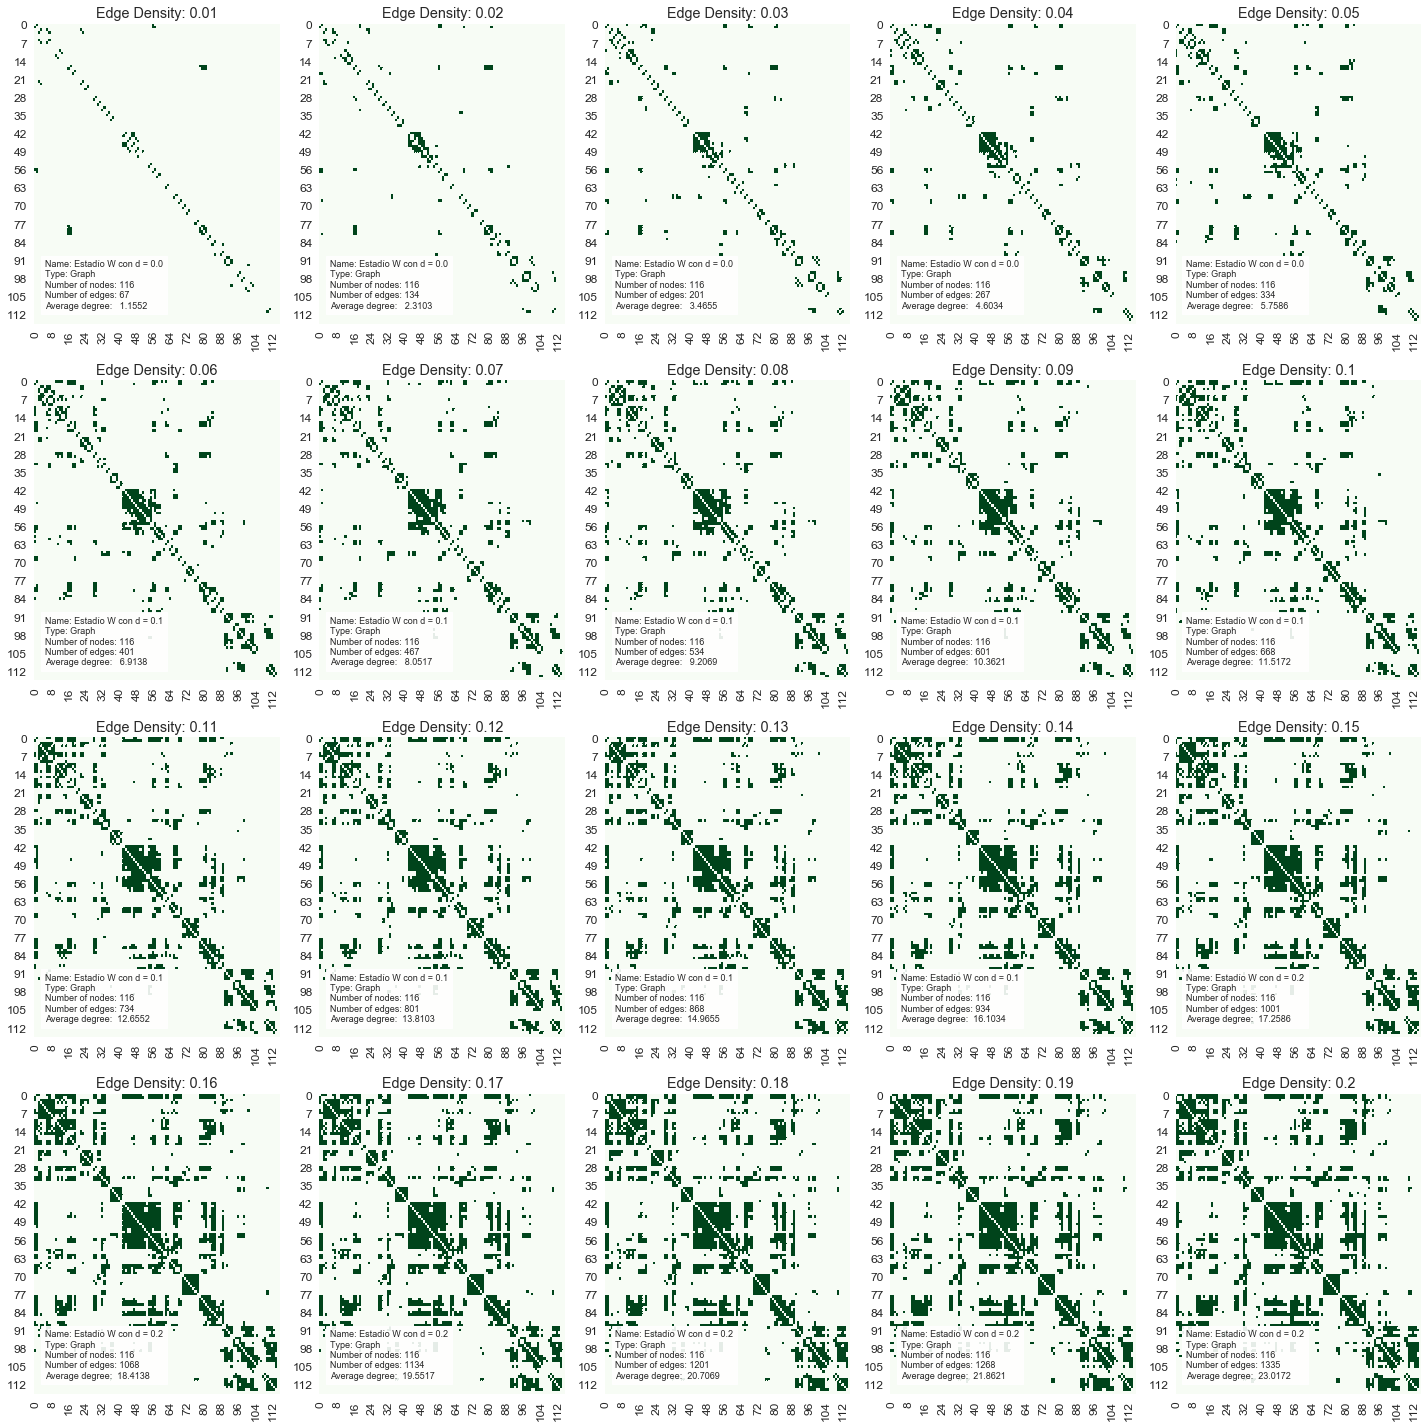

In [24]:
# Los gráficos. Verde = 1, blanco = 0, no pude ponerle una barra común a todos.
plt.figure(figsize=(20,20)) # tamaño del gráfico

for i, G in enumerate(Gs_w): # para cada i (número de orden) y G (los gráficos generados anteriormente)

    plt.subplot(4,5,i+1) # grilla de 2x5
    sns.heatmap(nx.to_numpy_array(G), cbar= False, cmap = "Greens") # el heatmap de cada G
    plt.title('Edge Density: {:0.2}'.format(densities[i])) # el título indicando la densidad
    G.name = "Estadío W con d = " + str(round(densities[i],1)) # "Name" dentro del cuadrito
    textstr = nx.info(G) # el texto dentro del cuadito
    plt.text(5, 110, textstr, fontsize=9, bbox=dict(facecolor="white", alpha=0.9)) # El cuadrito de texto

plt.tight_layout() # se podría customizar el padding

In [ ]:
# Los gráficos. Verde = 1, blanco = 0, no pude ponerle una barra común a todos.
plt.figure(figsize=(20,5)) # tamaño del gráfico

for i, G in enumerate(Gs_w): # para cada i (número de orden) y G (los gráficos generados anteriormente)

    plt.subplot(1,5,i+1) # grilla
    sns.heatmap(nx.to_numpy_array(G), cbar= False, cmap = "Greens") # el heatmap de cada G
    plt.title('Edge Density: {:0.2}'.format(densities1[i])) # el título indicando la densidad
    G.name = "Estadío W con d = " + str(round(densities1[i],1)) # "Name" dentro del cuadrito
    textstr = nx.info(G) # el texto dentro del cuadito
    plt.text(5, 110, textstr, fontsize=9, bbox=dict(facecolor="white", alpha=0.9)) # El cuadrito de texto

plt.tight_layout() # se podría customizar el padding

### Estadío del sueño N1

In [28]:
# Genero la lista de gráficos
Gs_n1 = matrix2graphslist(df_n1, densities)

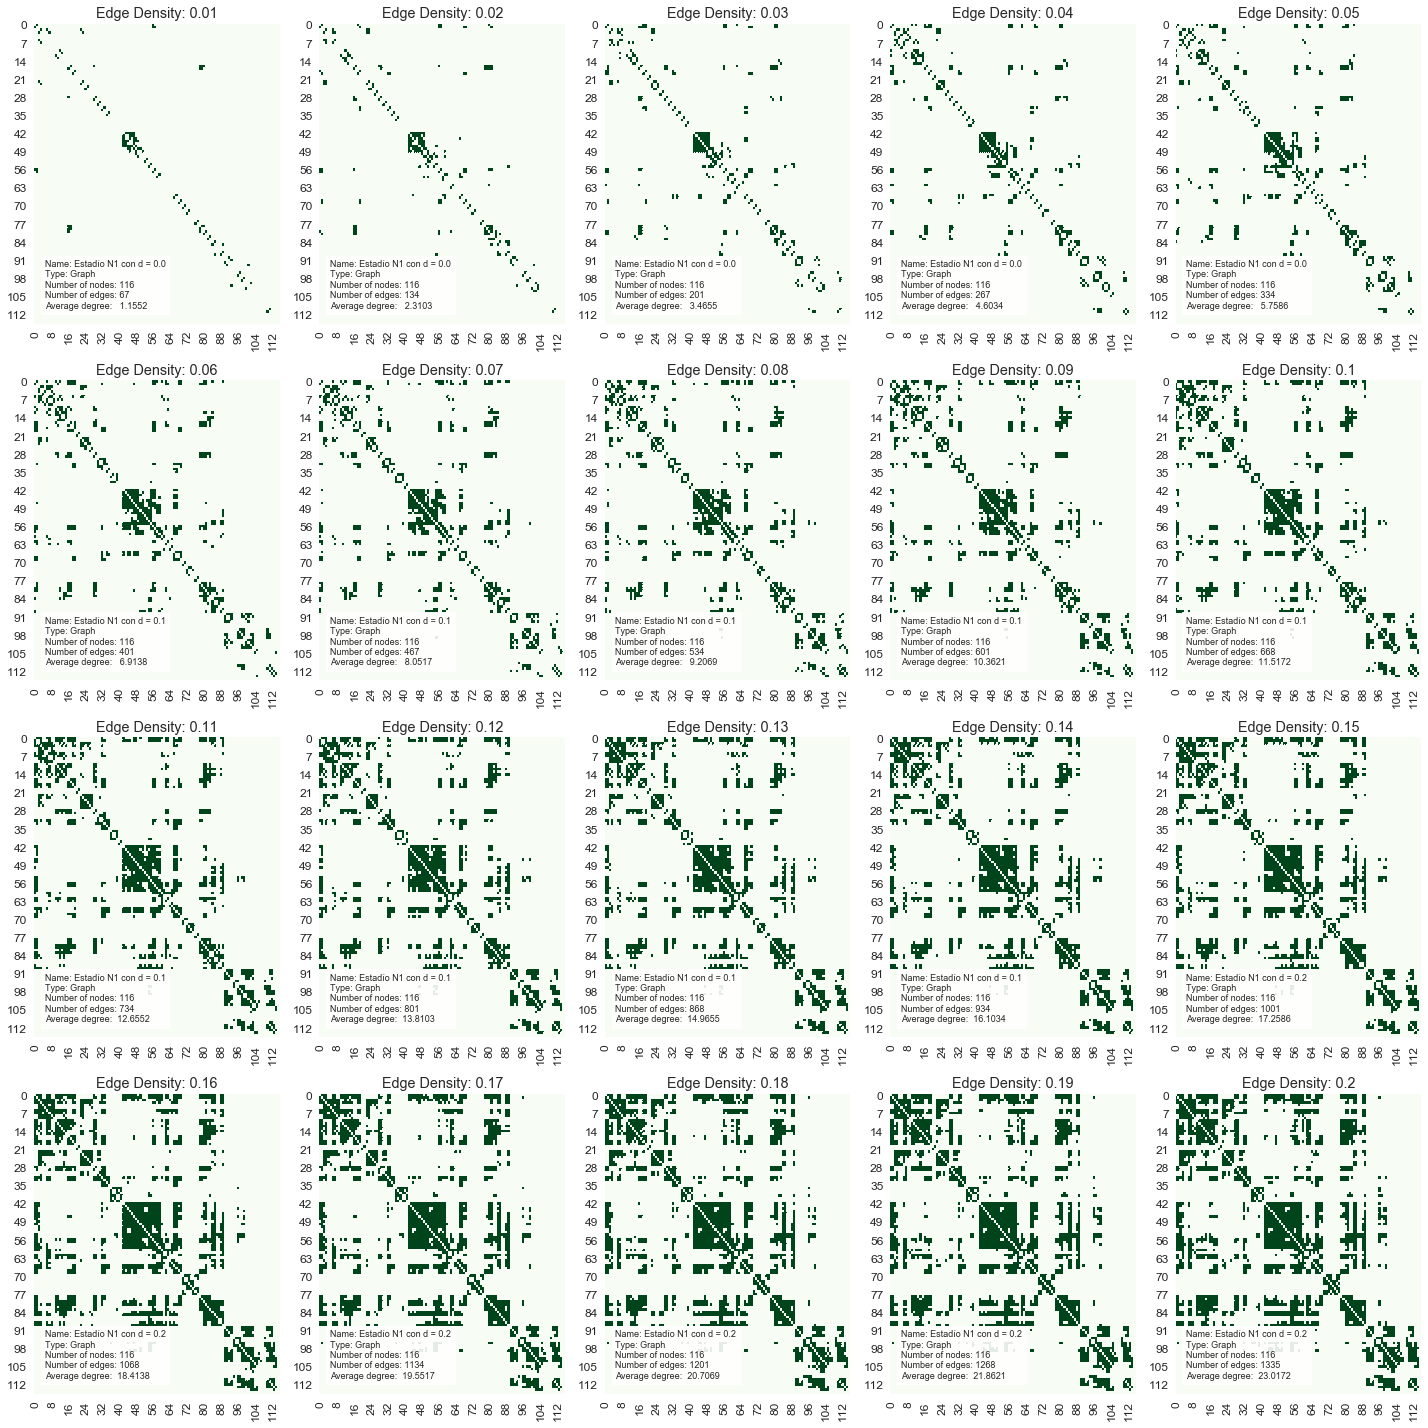

In [29]:
# Los gráficos
plt.figure(figsize=(20,20))

for i, G in enumerate(Gs_n1):

    plt.subplot(4,5,i+1)
    sns.heatmap(nx.to_numpy_array(G), cbar= False, cmap = "Greens")
    plt.title('Edge Density: {:0.2}'.format(densities[i]))
    G.name = "Estadío N1 con d = " + str(round(densities[i],1))
    textstr = nx.info(G)
    plt.text(5, 110, textstr, fontsize=9, bbox=dict(facecolor="white", alpha=0.9))

plt.tight_layout()

In [ ]:
# Los gráficos. Verde = 1, blanco = 0, no pude ponerle una barra común a todos.
plt.figure(figsize=(20,5)) # tamaño del gráfico

for i, G in enumerate(Gs_n1): # para cada i (número de orden) y G (los gráficos generados anteriormente)

    plt.subplot(1,5,i+1) # grilla
    sns.heatmap(nx.to_numpy_array(G), cbar= False, cmap = "Greens") # el heatmap de cada G
    plt.title('Edge Density: {:0.2}'.format(densities1[i])) # el título indicando la densidad
    G.name = "Estadío N1 con d = " + str(round(densities1[i],1)) # "Name" dentro del cuadrito
    textstr = nx.info(G) # el texto dentro del cuadito
    plt.text(5, 110, textstr, fontsize=9, bbox=dict(facecolor="white", alpha=0.9)) # El cuadrito de texto

plt.tight_layout() # se podría customizar el padding

### Estadío del sueño N2

In [32]:
# Genero la lista de gráficos
Gs_n2 = matrix2graphslist(df_n2, densities)

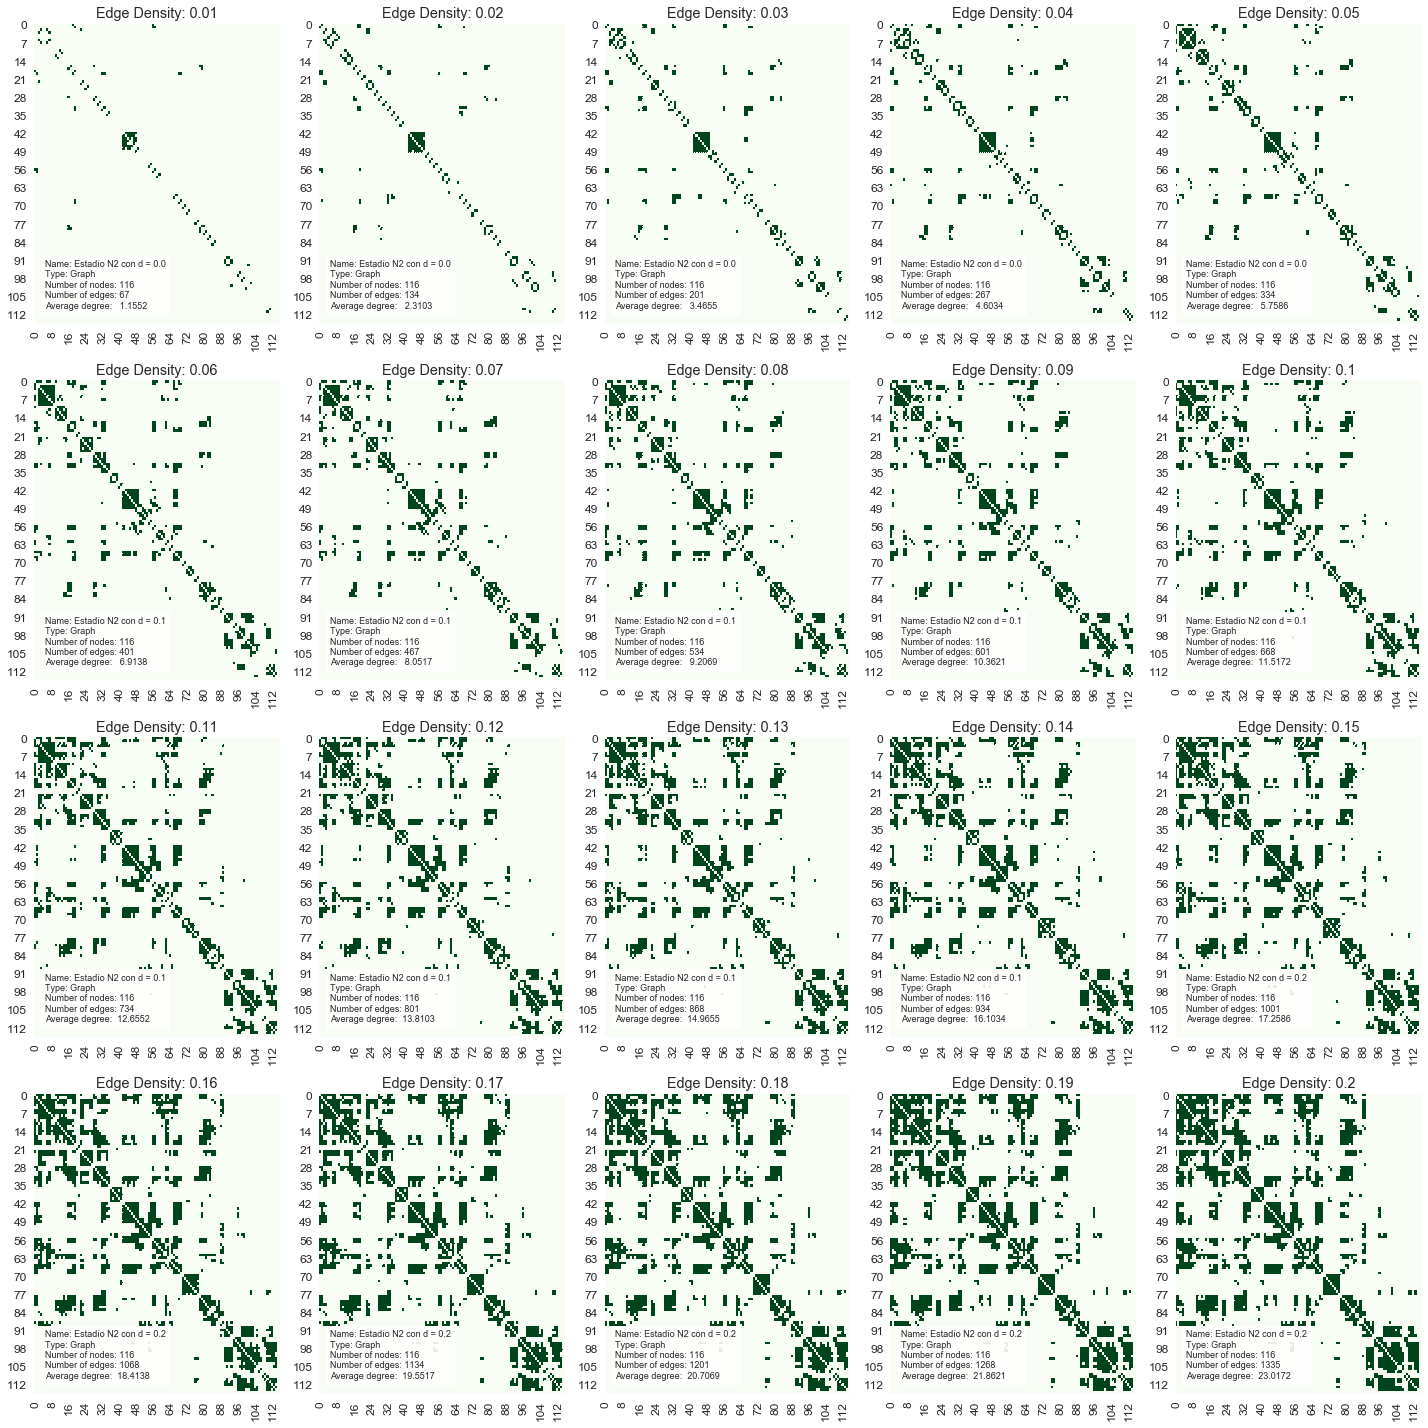

In [33]:
# Los gráficos
plt.figure(figsize=(20,20))

for i, G in enumerate(Gs_n2):

    plt.subplot(4,5,i+1)
    sns.heatmap(nx.to_numpy_array(G), cbar= False, cmap = "Greens")
    plt.title('Edge Density: {:0.2}'.format(densities[i]))
    G.name = "Estadío N2 con d = " + str(round(densities[i],1))
    textstr = nx.info(G)
    plt.text(5, 110, textstr, fontsize=9, bbox=dict(facecolor="white", alpha=0.9))

plt.tight_layout()

In [ ]:
# Los gráficos. Verde = 1, blanco = 0, no pude ponerle una barra común a todos.
plt.figure(figsize=(20,5)) # tamaño del gráfico

for i, G in enumerate(Gs_n2): # para cada i (número de orden) y G (los gráficos generados anteriormente)

    plt.subplot(1,5,i+1) # grilla
    sns.heatmap(nx.to_numpy_array(G), cbar= False, cmap = "Greens") # el heatmap de cada G
    plt.title('Edge Density: {:0.2}'.format(densities1[i])) # el título indicando la densidad
    G.name = "Estadío N2 con d = " + str(round(densities1[i],1)) # "Name" dentro del cuadrito
    textstr = nx.info(G) # el texto dentro del cuadito
    plt.text(5, 110, textstr, fontsize=9, bbox=dict(facecolor="white", alpha=0.9)) # El cuadrito de texto

plt.tight_layout() # se podría customizar el padding

### Estadío del sueño N3

In [35]:
# Genero la lista de gráficos
Gs_n3 = matrix2graphslist(df_n3, densities)

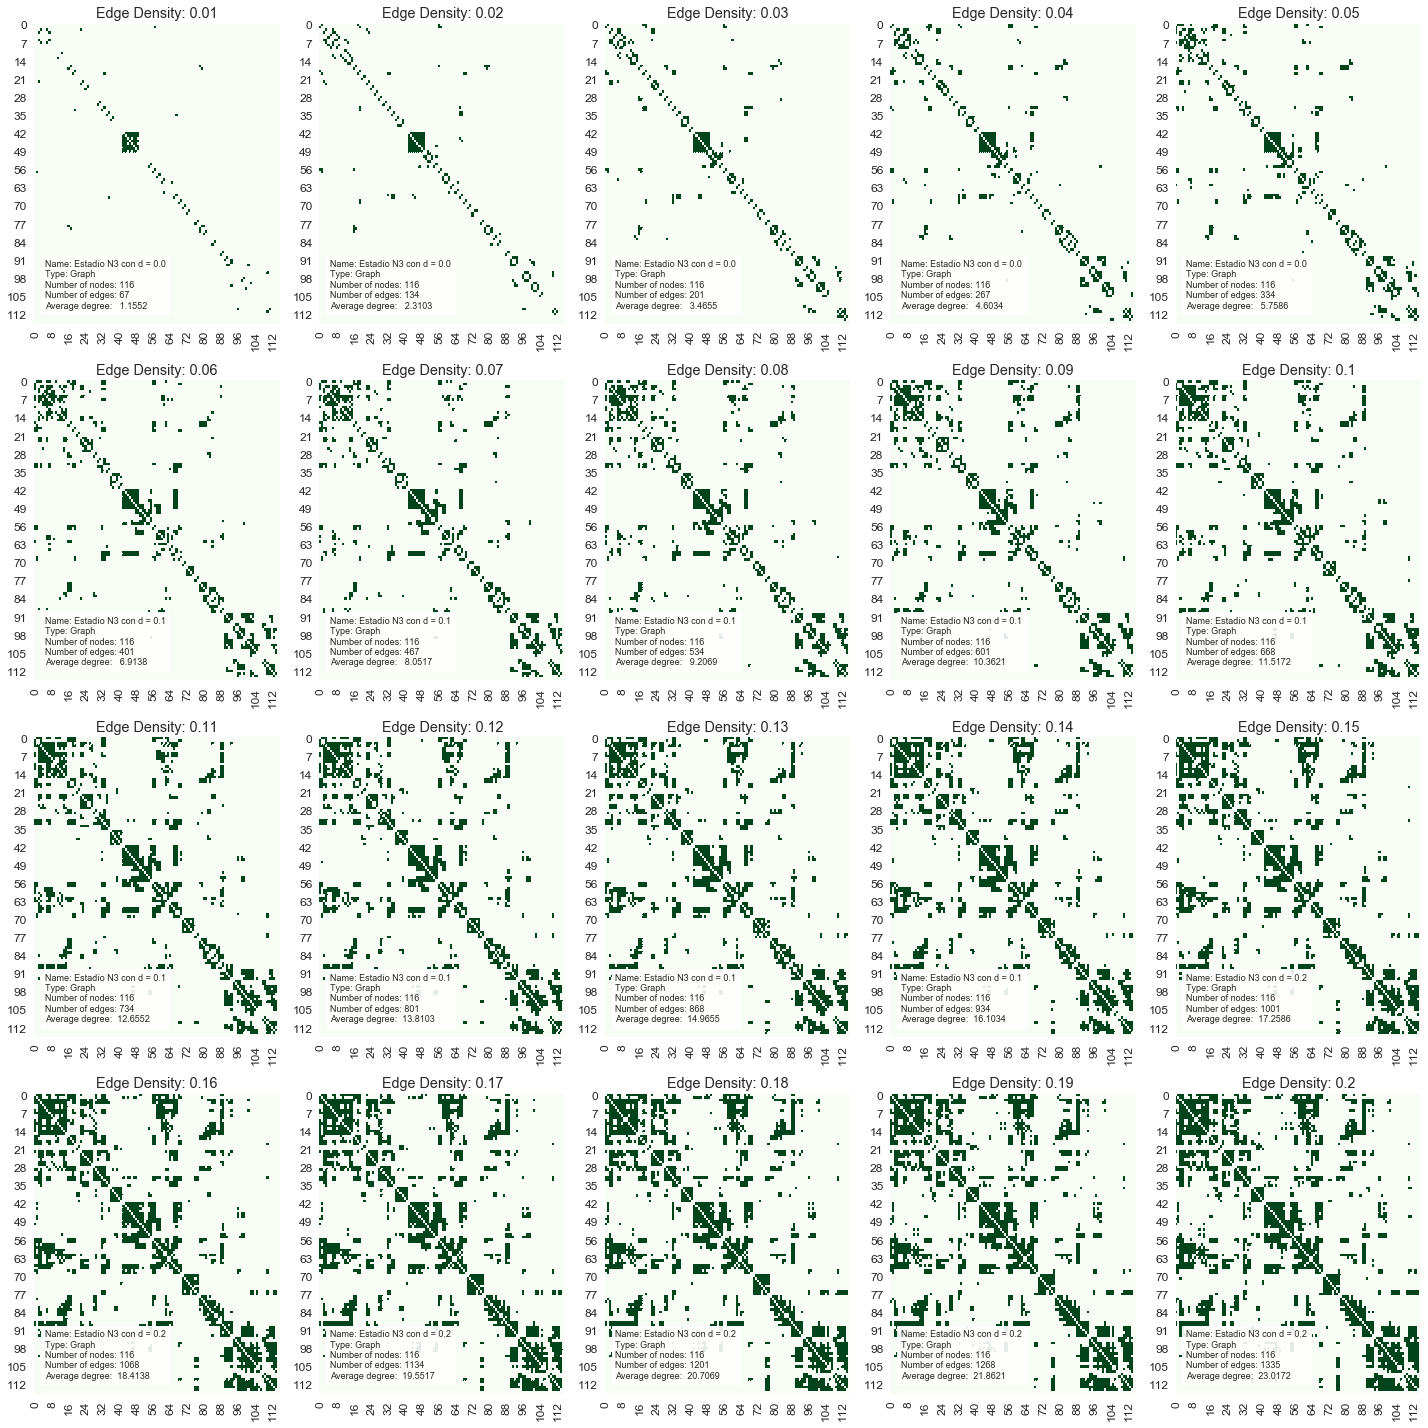

In [36]:
# Los gráficos
plt.figure(figsize=(20,20))

for i, G in enumerate(Gs_n3):

    plt.subplot(4,5,i+1)
    sns.heatmap(nx.to_numpy_array(G), cbar= False, cmap = "Greens")
    plt.title('Edge Density: {:0.2}'.format(densities[i]))
    G.name = "Estadío N3 con d = " + str(round(densities[i],1))
    textstr = nx.info(G)
    plt.text(5, 110, textstr, fontsize=9, bbox=dict(facecolor="white", alpha=0.9))

plt.tight_layout()

In [ ]:
# Los gráficos. Verde = 1, blanco = 0, no pude ponerle una barra común a todos.
plt.figure(figsize=(20,5)) # tamaño del gráfico

for i, G in enumerate(Gs_n3): # para cada i (número de orden) y G (los gráficos generados anteriormente)

    plt.subplot(1,5,i+1) # grilla
    sns.heatmap(nx.to_numpy_array(G), cbar= False, cmap = "Greens") # el heatmap de cada G
    plt.title('Edge Density: {:0.2}'.format(densities1[i])) # el título indicando la densidad
    G.name = "Estadío N3 con d = " + str(round(densities1[i],1)) # "Name" dentro del cuadrito
    textstr = nx.info(G) # el texto dentro del cuadito
    plt.text(5, 110, textstr, fontsize=9, bbox=dict(facecolor="white", alpha=0.9)) # El cuadrito de texto

plt.tight_layout() # se podría customizar el padding

## Comparaciones

In [111]:
# Grado de cada nodo
def MaxDegree(graph_list):
    deg = []
    for G in graph_list:
        deg_nodo = []
        for i in list(range(116)):
            a = G.degree[i]
            deg_nodo.append(a)
        b = max(deg_nodo)
        deg.append(b)
    return(deg)

### Centralidad de grado

In [154]:
# Centralidad de grado (se calcula por nodo) máximo de cada grafo
def DegreeCentrality(graph_list):
    deg = []
    for G in graph_list:
        deg_nodo = []
        for i in list(range(116)):
            a = nx.degree_centrality(G)[i]
            deg_nodo.append(a)
        b = max(deg_nodo)
        deg.append(b)
    return(deg)

In [160]:
DegCentrality = pd.DataFrame({"Densidad":densities,"W":DegreeCentrality(Gs_w),"N1":DegreeCentrality(Gs_n1),"N2":DegreeCentrality(Gs_n2),"N3":DegreeCentrality(Gs_n3)})

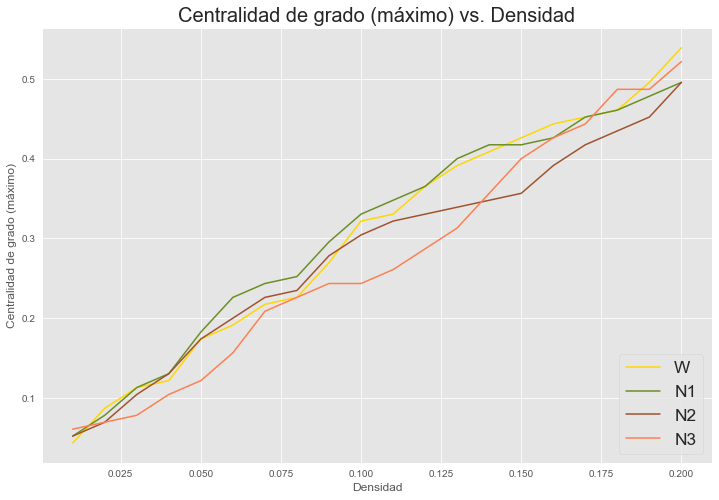

In [308]:
ax = sns.lineplot(x="Densidad", y= "W", data = DegCentrality, color = "gold", label = "W")
ax = sns.lineplot(x="Densidad", y= "N1", data = DegCentrality, color = "olivedrab", label = "N1")
ax = sns.lineplot(x="Densidad", y= "N2", data = DegCentrality, color = "sienna", label = "N2")
ax = sns.lineplot(x="Densidad", y= "N3", data = DegCentrality, color = "coral", label = "N3")
plt.title('Centralidad de grado (máximo) vs. Densidad', fontdict = {"fontsize": 20})
ax.set(xlabel='Densidad', ylabel='Centralidad de grado (máximo)')
plt.legend(loc = "lower right", fontsize='xx-large')
plt.show()

### Centralidad de cercanía (closeness)

In [332]:
# Centralidad de grado (se calcula por nodo) máximo de cada grafo
def CloseCentrality(graph_list):
    close = []
    for G in graph_list:
        close_nodo = []
        for i in list(range(116)):
            a = nx.closeness_centrality(G)[i]
            close_nodo.append(a)
        b = max(close_nodo)
        close.append(b)
    return(close)

In [333]:
CloseCentrality = pd.DataFrame({"Densidad":densities,"W":CloseCentrality(Gs_w),"N1":CloseCentrality(Gs_n1),"N2":CloseCentrality(Gs_n2),"N3":CloseCentrality(Gs_n3)})

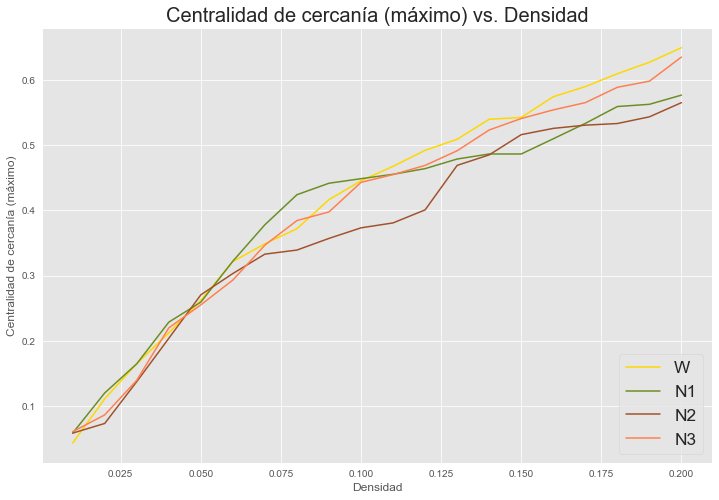

In [334]:
ax = sns.lineplot(x="Densidad", y= "W", data = CloseCentrality, color = "gold", label = "W")
ax = sns.lineplot(x="Densidad", y= "N1", data = CloseCentrality, color = "olivedrab", label = "N1")
ax = sns.lineplot(x="Densidad", y= "N2", data = CloseCentrality, color = "sienna", label = "N2")
ax = sns.lineplot(x="Densidad", y= "N3", data = CloseCentrality, color = "coral", label = "N3")
plt.title('Centralidad de cercanía (máximo) vs. Densidad', fontdict = {"fontsize": 20})
ax.set(xlabel='Densidad', ylabel='Centralidad de cercanía (máximo)')
plt.legend(loc = "lower right", fontsize='xx-large')
plt.show()

### Centralidad de intermediación (betweeness)

In [335]:
# Centralidad de grado (se calcula por nodo) máximo de cada grafo
def BetweenCentrality(graph_list):
    bet = []
    for G in graph_list:
        bet_nodo = []
        for i in list(range(116)):
            a = nx.betweenness_centrality(G)[i]
            bet_nodo.append(a)
        b = max(bet_nodo)
        bet.append(b)
    return(bet)

In [336]:
BetCentrality = pd.DataFrame({"Densidad":densities,"W":BetweenCentrality(Gs_w),"N1":BetweenCentrality(Gs_n1),"N2":BetweenCentrality(Gs_n2),"N3":BetweenCentrality(Gs_n3)})

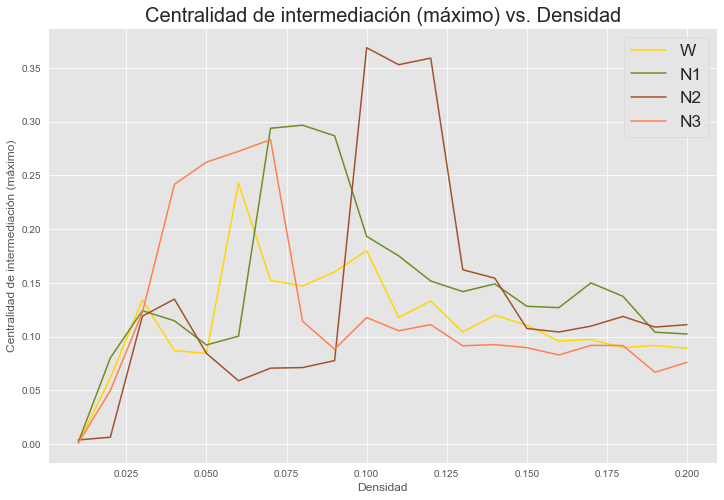

In [338]:
ax = sns.lineplot(x="Densidad", y= "W", data = BetCentrality, color = "gold", label = "W")
ax = sns.lineplot(x="Densidad", y= "N1", data = BetCentrality, color = "olivedrab", label = "N1")
ax = sns.lineplot(x="Densidad", y= "N2", data = BetCentrality, color = "sienna", label = "N2")
ax = sns.lineplot(x="Densidad", y= "N3", data = BetCentrality, color = "coral", label = "N3")
plt.title('Centralidad de intermediación (máximo) vs. Densidad', fontdict = {"fontsize": 20})
ax.set(xlabel='Densidad', ylabel='Centralidad de intermediación (máximo)')
plt.legend(loc = "upper right", fontsize='xx-large')
plt.show()

### Coeficiente de clustering

In [38]:
# Coeficiente de clustering global
avg_clustering_w = pd.DataFrame({"Densidad": densities, "C. Clustering": [nx.average_clustering(G) for G in Gs_w]})
avg_clustering_n1 = pd.DataFrame({"Densidad": densities, "C. Clustering": [nx.average_clustering(G) for G in Gs_n1]})
avg_clustering_n2 = pd.DataFrame({"Densidad": densities, "C. Clustering": [nx.average_clustering(G) for G in Gs_n2]})
avg_clustering_n3 = pd.DataFrame({"Densidad": densities, "C. Clustering": [nx.average_clustering(G) for G in Gs_n3]})

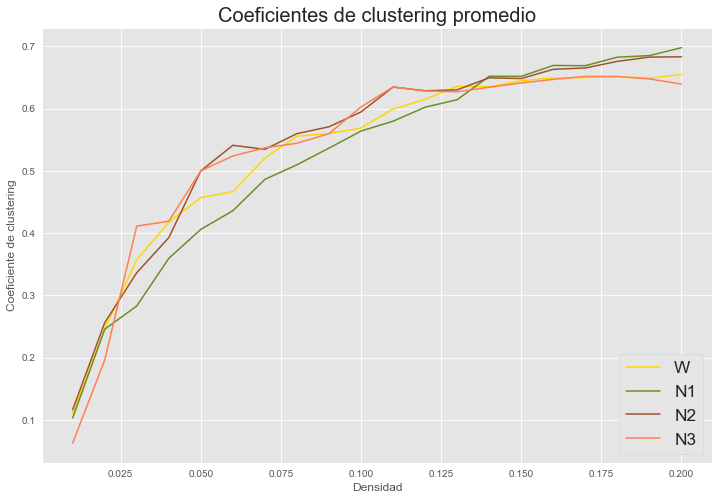

In [309]:
ax = sns.lineplot(x="Densidad", y= "C. Clustering", data = avg_clustering_w, color = "gold", label = "W")
ax1 = sns.lineplot(x="Densidad", y= "C. Clustering", data = avg_clustering_n1, color = "olivedrab", label = "N1")
ax2 = sns.lineplot(x="Densidad", y= "C. Clustering", data = avg_clustering_n2, color = "sienna", label = "N2")
ax3 = sns.lineplot(x="Densidad", y= "C. Clustering", data = avg_clustering_n3, color = "coral", label = "N3")
plt.title('Coeficientes de clustering promedio', fontdict = {"fontsize": 20})
ax.set(xlabel='Densidad', ylabel='Coeficiente de clustering')
plt.legend(loc = "lower right", fontsize='xx-large')
plt.show()

# Tarea 2: Comunidades y coeficiente de modularidad

Para los distintos valores de la densidad de aristas (δ), determinar comunidades a partir de algoritmo de Louvain [Blondel et al., 2008] y estimar el coeficiente de modularidad (Q). Graficar Q y el número de comunidades (NC) en función de δ, y comparar los resultados con el comportamiento de una red random que preserve la distribución de grados de los nodos.

In [173]:
import community
from networkx.generators.degree_seq import expected_degree_graph
from collections import Counter

In [174]:
# Esta función toma la lista de grafos y devuelve dataframes (para dicho grafos y para el random) con los valores de Q y NC
def louvain(graph_list):
    Q_list = [] # lista para almacenar los coeficientes para cada densidad
    NC_list = [] # Lista para almacenar el número de comunidades
    DPR_Q_list = [] # ídem, para la degree preserving randomnization
    DPR_NC_list = [] # ídem, para la degree preserving randomnization

    for G in graph_list:
        partition = community.best_partition(G, random_state=55) # Se busca la mejor particion con Louvain
        Q = community.modularity( partition, G ) # Coeficiente de modularidad
        NC = len(Counter(partition.values()).most_common()) # Número de comunidades
        Q_list.append(Q) # se agrega a la lista
        NC_list.append(NC) # se agrega a la lists

        DPR = expected_degree_graph([deg for (_, deg) in G.degree()], selfloops=False, seed = 55) # degree preserving randomnization
        partition_DPR = community.best_partition(DPR, random_state=55) # Se busca la mejor particion con Louvain
        DPR_Q = community.modularity( partition_DPR, DPR ) # Coeficiente de modularidad
        DPR_NC = len(Counter(partition_DPR.values()).most_common()) # Número de comunidades
        DPR_Q_list.append(DPR_Q) # se agrega a la lista
        DPR_NC_list.append(DPR_NC) # se agrega a la lists

    # DataFrame para graficar
    QNC_list = pd.DataFrame({"Densidad":densities, "Modularidad":Q_list, "NC": NC_list})
    DPR_QNC_list = pd.DataFrame({"Densidad":densities, "Modularidad":DPR_Q_list, "NC": DPR_NC_list})
    return(QNC_list, DPR_QNC_list)

**Comunidades del estadío W (Louvain)**

In [175]:
# Recordar que Gs_w almacena los grafos para cada densidad del estadio W
QNC_w, DPR_QNC_w = louvain(Gs_w)

**Comunidades del estadío N1 (Louvain)**

In [176]:
# Recordar que Gs_n1 almacena los grafos para cada densidad del estadio N1
QNC_n1, DPR_QNC_n1 = louvain(Gs_n1)

**Comunidades del estadío N2 (Louvain)**

In [177]:
# Recordar que Gs_n2 almacena los grafos para cada densidad del estadio N2
QNC_n2, DPR_QNC_n2 = louvain(Gs_n2)

**Comunidades del estadío N3 (Louvain)**

In [178]:
# Recordar que Gs_n3 almacena los grafos para cada densidad del estadio N3
QNC_n3, DPR_QNC_n3 = louvain(Gs_n3)

## Tarea 2.1: Algoritmos de detección de comunidades

Comparar el resultado del algoritmo de Louvain con otros, como Girvan-Newman. Discutir las las diferencias para el caso particular.

In [179]:
# Esta función convierte las particiones de Girvan Newman (tuplas) en un diccionario
def partition_set_to_dict(m):
    d = {}
    for i,c in enumerate(m):
        for n in c:
            d[n] = i
    return d

In [23]:
# Esta función toma como entrada la lista de grafos y aplica el algoritmo de Girvan-Newman para encontrar comunidades
# (lo hace para los grafos de etrada y Random)
def GirvanNewman(graph_list):
    Q_list = [] # lista para almacenar los coeficientes para cada densidad
    NC_list = [] # Lista para almacenar el número de comunidades
    DPR_Q_list = [] # ídem, para la degree preserving randomnization
    DPR_NC_list = [] # ídem, para la degree preserving randomnization

    for G in graph_list: # para cada grafo en la lista
        partition = nx.community.girvan_newman(G) # Se generan todas las particiones con Girvan-Newman
        partition = list(partition) # se pasa a una lista
        modularity1 = [] # lista para almacenar temporalmenta las modularidades

        DPR = expected_degree_graph([deg for (_, deg) in G.degree()], selfloops=False, seed = 55) # degree preserving randomnization
        DPR_partition = nx.community.girvan_newman(DPR) # Se generan todas las particiones con Girvan-Newman
        DPR_partition = list(DPR_partition) # se pasa a una lista
        DPR_modularity1 = [] # lista para almacenar temporalmenta las modularidades

        for p, q in zip(partition, DPR_partition): # para cada elemento en las listas de particiones (de nuestro grafo y del grafo random)
            modularity1.append(community.modularity(partition_set_to_dict(p),G))  # se agrega el ceficiente de modularidad de la partición p
            DPR_modularity1.append(community.modularity(partition_set_to_dict(q),DPR)) # se agrega el ceficiente de modularidad de la partición q

        idx = np.argmax(modularity1) # el índice del máximo coeficiente
        Q = max(modularity1) # el máximo coeficiente se toma como el representativo del grafo
        Q_list.append(Q) # se agrega a la lista
        NC = len(Counter(partition_set_to_dict(partition[idx]).values()).most_common()) # Número de comunidades
        NC_list.append(NC) # se agrega a la lista

        DPR_idx = np.argmax(DPR_modularity1) # el índice del máximo coeficiente del random
        DPR_Q = max(DPR_modularity1) # el máximo coeficiente se toma como el representativo del grafo
        DPR_Q_list.append(DPR_Q) # se agrega a la lista
        DPR_NC = len(Counter(partition_set_to_dict(DPR_partition[DPR_idx]).values()).most_common()) # Número de comunidades
        DPR_NC_list.append(DPR_NC) # se agrega a la lists

    # DataFrame para graficar
    QNC_gn = pd.DataFrame({"Densidad":densities, "Modularidad":Q_list, "NC": NC_list})
    DPR_QNC_gn = pd.DataFrame({"Densidad":densities, "Modularidad":DPR_Q_list, "NC": DPR_NC_list})
    return(QNC_gn, DPR_QNC_gn)

**Comunidades del estadío W (Girvan-Newman)**

In [ ]:
"""# Recordar que Gs_w almacena los grafos para cada densidad del estadio W
QNC_w_gn, DPR_QNC_w_gn = GirvanNewman(Gs_w)

# Exporto el csv para no correrlo de nuevo
QNC_w_gn.to_csv(r'.\\QNC_w_gn.csv')
DPR_QNC_w_gn.to_csv(r'.\\DPR_QNC_w_gn.csv')"""

In [184]:
QNC_w_gn = pd.read_csv("QNC_w_gn.csv", usecols = ["Densidad", "Modularidad","NC"])
DPR_QNC_w_gn = pd.read_csv("DPR_QNC_w_gn.csv", usecols = ["Densidad", "Modularidad","NC"])

**Comunidades del estadío N1 (Girvan-Newman)**

In [152]:
"""# Recordar que Gs_n1 almacena los grafos para cada densidad del estadio N1
QNC_n1_gn, DPR_QNC_n1_gn = GirvanNewman(Gs_n1)

# Exporto el csv para no correrlo de nuevo
QNC_n1_gn.to_csv(r'.\\QNC_n1_gn.csv')
DPR_QNC_n1_gn.to_csv(r'.\\DPR_QNC_n1_gn.csv')"""

In [180]:
QNC_n1_gn = pd.read_csv("QNC_n1_gn.csv", usecols = ["Densidad", "Modularidad","NC"])
DPR_QNC_n1_gn = pd.read_csv("DPR_QNC_n1_gn.csv", usecols = ["Densidad", "Modularidad","NC"])

**Comunidades del estadío N2 (Girvan-Newman)**

In [156]:
"""# Recordar que Gs_n2 almacena los grafos para cada densidad del estadio N2
QNC_n2_gn, DPR_QNC_n2_gn = GirvanNewman(Gs_n2)

# Exporto el csv para no correrlo de nuevo
QNC_n2_gn.to_csv(r'.\\QNC_n2_gn.csv')
DPR_QNC_n2_gn.to_csv(r'.\\DPR_QNC_n2_gn.csv')"""

In [181]:
QNC_n2_gn = pd.read_csv("QNC_n2_gn.csv", usecols = ["Densidad", "Modularidad","NC"])
DPR_QNC_n2_gn = pd.read_csv("DPR_QNC_n2_gn.csv", usecols = ["Densidad", "Modularidad","NC"])

**Comunidades del estadío N3 (Girvan-Newman)**

In [160]:
"""# Recordar que Gs_n3 almacena los grafos para cada densidad del estadio N3
QNC_n3_gn, DPR_QNC_n3_gn = GirvanNewman(Gs_n3)

# Exporto el csv para no correrlo de nuevo
QNC_n3_gn.to_csv(r'.\\QNC_n3_gn.csv')
DPR_QNC_n3_gn.to_csv(r'.\\DPR_QNC_n3_gn.csv')"""

In [182]:
QNC_n3_gn = pd.read_csv("QNC_n3_gn.csv", usecols = ["Densidad", "Modularidad","NC"])
DPR_QNC_n3_gn = pd.read_csv("DPR_QNC_n3_gn.csv", usecols = ["Densidad", "Modularidad","NC"])

### Gráficos comparativos

In [185]:
# Se juntan todos en un solo dataset para que sea más fácil graficar
QNC_w["estadio"] = "W"
QNC_w["algoritmo"] = "Louvain"
QNC_n1["estadio"] = "N1"
QNC_n1["algoritmo"] = "Louvain"
QNC_n2["estadio"] = "N2"
QNC_n2["algoritmo"] = "Louvain"
QNC_n3["estadio"] = "N3"
QNC_n3["algoritmo"] = "Louvain"

QNC_w_gn["estadio"] = "W"
QNC_w_gn["algoritmo"] = "Girvan-Newman"
QNC_n1_gn["estadio"] = "N1"
QNC_n1_gn["algoritmo"] = "Girvan-Newman"
QNC_n2_gn["estadio"] = "N2"
QNC_n2_gn["algoritmo"] = "Girvan-Newman"
QNC_n3_gn["estadio"] = "N3"
QNC_n3_gn["algoritmo"] = "Girvan-Newman"

todos = QNC_w.append(QNC_n1).append(QNC_n2).append(QNC_n3).append(QNC_w_gn).append(QNC_n1_gn).append(QNC_n2_gn).append(QNC_n3_gn)
todos

,Densidad,Modularidad,NC,estadio,algoritmo
0,0.01,0.917354,66,W,Louvain
1,0.02,0.798480,42,W,Louvain
2,0.03,0.753781,28,W,Louvain
3,0.04,0.701062,24,W,Louvain
4,0.05,0.637388,20,W,Louvain
...,...,...,...,...,...
15,0.16,0.385199,7,N3,Girvan-Newman
16,0.17,0.384735,5,N3,Girvan-Newman
17,0.18,0.369166,5,N3,Girvan-Newman
18,0.19,0.340630,13,N3,Girvan-Newman


In [186]:
# Se juntan todos en un solo dataset para que sea más fácil graficar (DPR)
DPR_QNC_w["estadio"] = "W"
DPR_QNC_w["algoritmo"] = "Louvain"
DPR_QNC_n1["estadio"] = "N1"
DPR_QNC_n1["algoritmo"] = "Louvain"
DPR_QNC_n2["estadio"] = "N2"
DPR_QNC_n2["algoritmo"] = "Louvain"
DPR_QNC_n3["estadio"] = "N3"
DPR_QNC_n3["algoritmo"] = "Louvain"

DPR_QNC_w_gn["estadio"] = "W"
DPR_QNC_w_gn["algoritmo"] = "Girvan-Newman"
DPR_QNC_n1_gn["estadio"] = "N1"
DPR_QNC_n1_gn["algoritmo"] = "Girvan-Newman"
DPR_QNC_n2_gn["estadio"] = "N2"
DPR_QNC_n2_gn["algoritmo"] = "Girvan-Newman"
DPR_QNC_n3_gn["estadio"] = "N3"
DPR_QNC_n3_gn["algoritmo"] = "Girvan-Newman"

DPR_todos = DPR_QNC_w.append(DPR_QNC_n1).append(DPR_QNC_n2).append(DPR_QNC_n3).append(DPR_QNC_w_gn).append(DPR_QNC_n1_gn).append(DPR_QNC_n2_gn).append(DPR_QNC_n3_gn)
DPR_todos

,Densidad,Modularidad,NC,estadio,algoritmo
0,0.01,0.631720,66,W,Louvain
1,0.02,0.487701,44,W,Louvain
2,0.03,0.447523,32,W,Louvain
3,0.04,0.359274,25,W,Louvain
4,0.05,0.296800,21,W,Louvain
...,...,...,...,...,...
15,0.16,0.014878,76,N3,Girvan-Newman
16,0.17,0.014347,62,N3,Girvan-Newman
17,0.18,0.020562,85,N3,Girvan-Newman
18,0.19,0.019007,88,N3,Girvan-Newman


**Estadio W vs. N1**

In [187]:
# filtro sólo los que voy a comparar
L_wn1 = todos[(todos["estadio"] == "W") | (todos["estadio"] == "N1")]
DPR_L_wn1 = DPR_todos[(DPR_todos["estadio"] == "W") | (DPR_todos["estadio"] == "N1")]

Text(0, 0.5, '')

<Figure size 864x576 with 0 Axes>

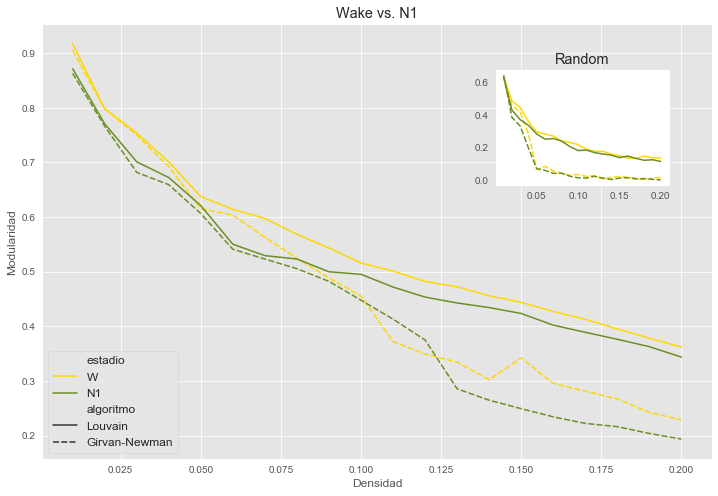

In [310]:
# Gráfico de Q
# El gráfico principal
plt.figure(figsize=(12,8))

fig, ax = plt.subplots()
sns.lineplot(x="Densidad", y="Modularidad", hue = "estadio", style = "algoritmo", data = L_wn1, palette = ["gold","olivedrab"])
plt.title('Wake vs. N1')
ax.legend(loc = "lower left", fontsize='large')

# El gráfico de DPR
a = plt.axes([.65, .6, .2, .2], facecolor='w')
sns.lineplot(x="Densidad", y="Modularidad", hue = "estadio", style = "algoritmo", data = DPR_L_wn1, palette = ["gold","olivedrab"], legend = False)
plt.title('Random')
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

<Figure size 864x576 with 0 Axes>

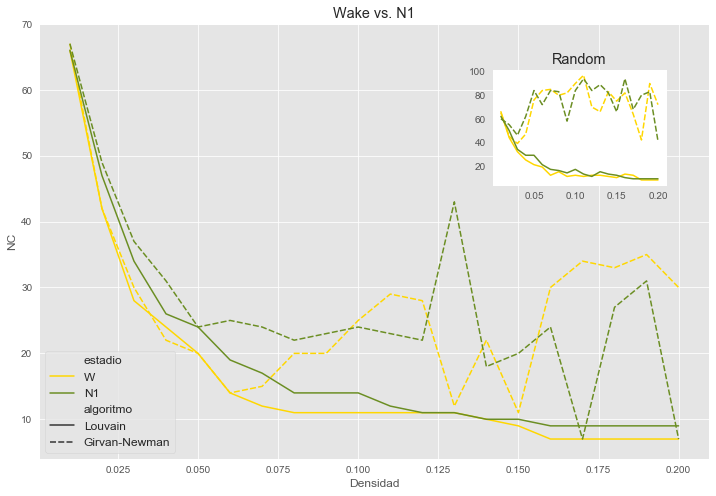

In [311]:
# Gráfico de NC
# El gráfico principal
plt.figure(figsize=(12,8))

fig, ax = plt.subplots()
sns.lineplot(x="Densidad", y="NC", hue = "estadio", style = "algoritmo", data = L_wn1, palette = ["gold","olivedrab"])
plt.title('Wake vs. N1')
ax.legend(loc = "lower left", fontsize='large')

# El gráfico de DPR
a = plt.axes([.65, .6, .2, .2], facecolor='w')
sns.lineplot(x="Densidad", y="NC", hue = "estadio", style = "algoritmo", data = DPR_L_wn1, palette = ["gold","olivedrab"], legend = False)
plt.title('Random')
plt.xlabel("")
plt.ylabel("")

**Estadio W vs. N2**

In [192]:
# filtro sólo los que voy a comparar
L_wn2 = todos[(todos["estadio"] == "W") | (todos["estadio"] == "N2")]
DPR_L_wn2 = DPR_todos[(DPR_todos["estadio"] == "W") | (DPR_todos["estadio"] == "N2")]

Text(0, 0.5, '')

<Figure size 864x576 with 0 Axes>

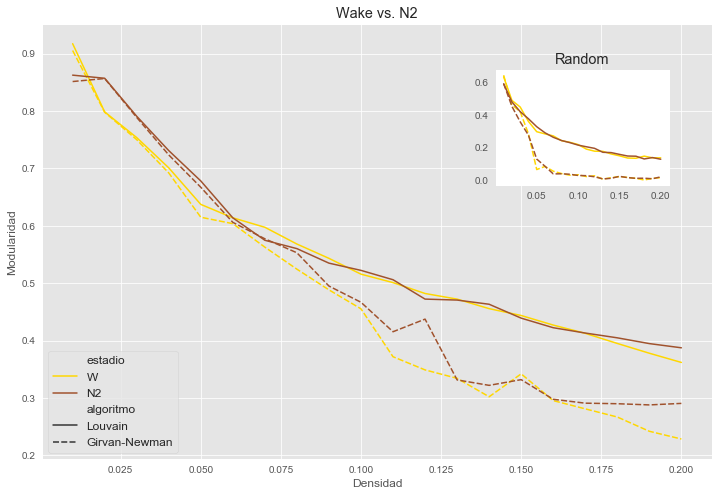

In [312]:
# Gráfico de Q
# El gráfico principal
plt.figure(figsize=(12,8))

fig, ax = plt.subplots()
sns.lineplot(x="Densidad", y="Modularidad", hue = "estadio", style = "algoritmo", data = L_wn2, palette = ["gold","sienna"])
plt.title('Wake vs. N2')
ax.legend(loc = "lower left", fontsize='large')

# El gráfico de DPR
a = plt.axes([.65, .6, .2, .2], facecolor='w')
sns.lineplot(x="Densidad", y="Modularidad", hue = "estadio", style = "algoritmo", data = DPR_L_wn2, palette = ["gold","sienna"], legend = False)
plt.title('Random')
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

<Figure size 864x576 with 0 Axes>

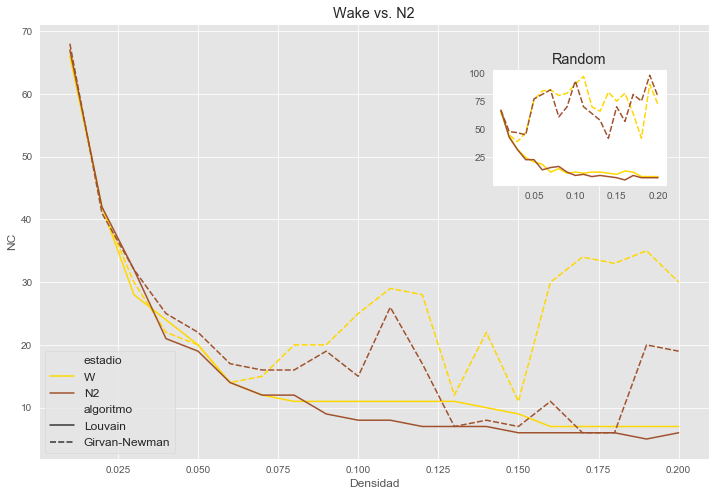

In [313]:
# Gráfico de NC
# El gráfico principal
plt.figure(figsize=(12,8))

fig, ax = plt.subplots()
sns.lineplot(x="Densidad", y="NC", hue = "estadio", style = "algoritmo", data = L_wn2, palette = ["gold","sienna"])
plt.title('Wake vs. N2')
ax.legend(loc = "lower left", fontsize='large')

# El gráfico de DPR
a = plt.axes([.65, .6, .2, .2], facecolor='w')
sns.lineplot(x="Densidad", y="NC", hue = "estadio", style = "algoritmo", data = DPR_L_wn2, palette = ["gold","sienna"], legend = False)
plt.title('Random')
plt.xlabel("")
plt.ylabel("")

**Estadio W vs. N3**

In [195]:
# filtro sólo los que voy a comparar
L_wn3 = todos[(todos["estadio"] == "W") | (todos["estadio"] == "N3")]
DPR_L_wn3 = DPR_todos[(DPR_todos["estadio"] == "W") | (DPR_todos["estadio"] == "N3")]

Text(0, 0.5, '')

<Figure size 864x576 with 0 Axes>

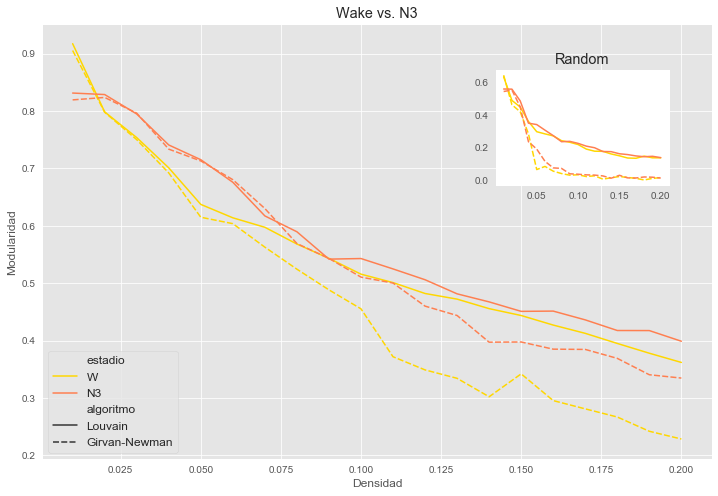

In [314]:
# Gráfico de Q
# El gráfico principal
plt.figure(figsize=(12,8))

fig, ax = plt.subplots()
sns.lineplot(x="Densidad", y="Modularidad", hue = "estadio", style = "algoritmo", data = L_wn3, palette = ["gold","coral"])
plt.title('Wake vs. N3')
ax.legend(loc = "lower left", fontsize='large')

# El gráfico de DPR
a = plt.axes([.65, .6, .2, .2], facecolor='w')
sns.lineplot(x="Densidad", y="Modularidad", hue = "estadio", style = "algoritmo", data = DPR_L_wn3, palette = ["gold","coral"], legend = False)
plt.title('Random')
plt.xlabel("")
plt.ylabel("")

Text(0, 0.5, '')

<Figure size 864x576 with 0 Axes>

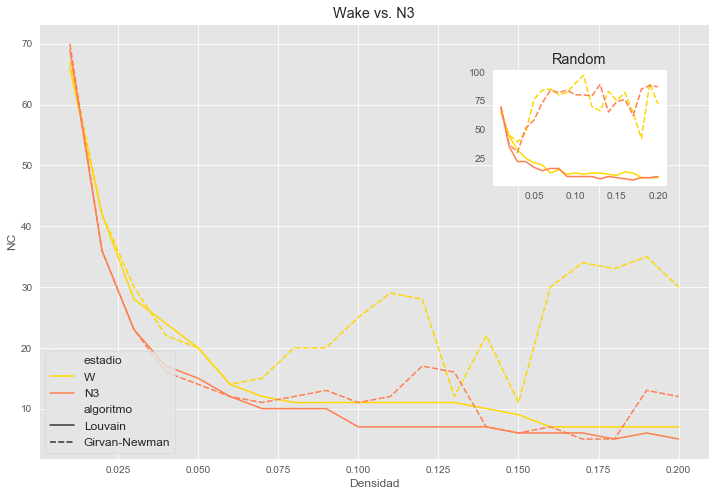

In [315]:
# Gráfico de NC
# El gráfico principal
plt.figure(figsize=(12,8))

fig, ax = plt.subplots()
sns.lineplot(x="Densidad", y="NC", hue = "estadio", style = "algoritmo", data = L_wn3, palette = ["gold","coral"])
plt.title('Wake vs. N3')
ax.legend(loc = "lower left", fontsize='large')

# El gráfico de DPR
a = plt.axes([.65, .6, .2, .2], facecolor='w')
sns.lineplot(x="Densidad", y="NC", hue = "estadio", style = "algoritmo", data = DPR_L_wn3, palette = ["gold","coral"], legend = False)
plt.title('Random')
plt.xlabel("")
plt.ylabel("")

# Tarea 3: Estadística

Repetir las curvas de modularidad (Q) y número de comunidades (NC) para cada sujeto y estadio del sueño, en función de δ, y comparar cada estadio N1, N2 y N3, con el estadio despierto W. Para cada valor de δ incluir una noción de significancia entre estadíos del sueño.<br>
<br>
Realizar este proceso para cada delta:<br>
 - Obtener el mejor particionado con Louvain de los grafos de los 18 sujetos para cada estadío.<br>
 - Obtener métricas Q y Nc de cada grafo.<br>
 - Hacer para cada comparación de a pares (Nx-W): Dado que se comparan de a pares (2 grupos), en lugar de comparar con anova se puede hacer un t-test con las 18 obs de cada grupo. Se podría usar en este caso un nivel de significancia de 5%.<br>
<br>
Luego, tendremos resultados de Nx-W en función de cada delta. Si calculamos por ejemplo para 15 deltas distintos, tendriamos que corregir por comparaciones múltiples con algún método. Serían 15 comparaciones para cada Nx-W vs delta, por lo que daría una prob de obtener al menos 1 falso positivo de 53.6%, así  que habría que determinar si son significativas las diferencias en cada delta de esas curvas usando Bonferroni por ej con un alfa de 0.003 en lugar de 0.05 para cada comparación.<br>
<br>
Un detalle, como Boferrini es muy estricto se puede probar otro metodo que use un alfa mas flexible (esto utlimo lo agrego juan) y de ultima comparar como da todo<br>

In [225]:
# Esta función toma la lista de archivos (csv) y las densidades y genera un dataframe con Q y NC para cada csv (Estadio_sujeto)
def Subject2graph(files, densities):
    Sujetos = pd.DataFrame(columns=["Densidad","Q","NC","Sujeto","Estadio"]) # un dataset vacio para ir concatenando
    for i in files: # para cada sujeto en la lista del estadio
        df = pd.read_csv(i, header=None) # carga del dataset
        n = df.shape[0] # el tamaño
        df -= np.diag(np.ones(n)) # borra los 1 de la diagonal
        Gs = matrix2graphslist(df, densities) # genera un grafo por cada densidad

        Q_list = [] # lista vacía de Q
        NC_list = [] # lista vacía de NC
        suj = int(i.split(".")[0].split("\\")[1].split("suj")[1]) # el número de sujeto
        estadio = i.split(".")[0].split("\\")[1].split("_")[0] # el estadio
        
        for j in Gs:
            partition = community.best_partition(j, random_state=55) # Se busca la mejor particion con Louvain
            Q = community.modularity( partition, j ) # Coeficiente de modularidad
            NC = len(Counter(partition.values()).most_common()) # Número de comunidades
            Q_list.append(Q) # se agrega a la lista
            NC_list.append(NC) # se agrega a la lists
            
        QNC = pd.DataFrame({"Densidad":densities, "Q":Q_list, "NC": NC_list, "Sujeto": suj, "Estadio": estadio}) # Dataframe
        Sujetos = Sujetos.append(QNC) # Se van agregando al dataframe de sujetos
    return(Sujetos)

**Estadio W**

In [226]:
# Aplico la función. Debe devolver un dataframe con 360 registros (18 sujetos x 20 densidades)
sujetos_w = Subject2graph(files_w, densities)
sujetos_w.shape

(360, 5)

**Estadio N1**

In [227]:
# Recordar que la lista de archivos está almacenada en files_n1
# Aplico la función. Debe devolver un dataframe con 360 registros (18 sujetos x 20 densidades)
sujetos_n1 = Subject2graph(files_n1, densities)
sujetos_n1.shape

(360, 5)

**Estadio N2**

In [228]:
# Recordar que la lista de archivos está almacenada en files_n2
# Aplico la función. Debe devolver un dataframe con 360 registros (18 sujetos x 20 densidades)
sujetos_n2 = Subject2graph(files_n2, densities)
sujetos_n2.shape

(360, 5)

**Estadio N3**

In [229]:
# Recordar que la lista de archivos está almacenada en files_n3
# Aplico la función. Debe devolver un dataframe con 360 registros (18 sujetos x 20 densidades)
sujetos_n3 = Subject2graph(files_n3, densities)
sujetos_n3.shape

(360, 5)

## Comparaciones

In [230]:
from scipy import stats

In [231]:
# Esta función devuelve el p-valor para cada densidad, de la métrica deseada (Q o NC)
def Ttest(df1, df2, densities, metrica, alfa):
    pvalue_list = [] # lista vacía
    for i in densities: # iteramos sobre las densidades
        
        a = df1[df1["Densidad"]==i].sort_values("Sujeto") # El estadío W
        b = df2[df2["Densidad"]==i].sort_values("Sujeto") # El estadío para comparar
        pvalue = stats.ttest_rel(a[metrica], b[metrica])[1]
        pvalue_list.append(pvalue) # agregamos el p-valor a la lista
        
    pvalue_df = pd.DataFrame({"Densidad": densities, "Pvalor": pvalue_list, "Metrica": metrica}) # hacemos el dataframe
    return(pvalue_df)

In [232]:
# Pvalores para Q
pvalor_Q_wn1 = Ttest(sujetos_w, sujetos_n1, densities, "Q", 0.05)
pvalor_Q_wn2 = Ttest(sujetos_w, sujetos_n2, densities, "Q", 0.05)
pvalor_Q_wn3 = Ttest(sujetos_w, sujetos_n3, densities, "Q", 0.05)

# Pvalores para NC
pvalor_NC_wn1 = Ttest(sujetos_w, sujetos_n1, densities, "NC", 0.05)
pvalor_NC_wn2 = Ttest(sujetos_w, sujetos_n2, densities, "NC", 0.05)
pvalor_NC_wn3 = Ttest(sujetos_w, sujetos_n3, densities, "NC", 0.05)

<Figure size 864x576 with 0 Axes>

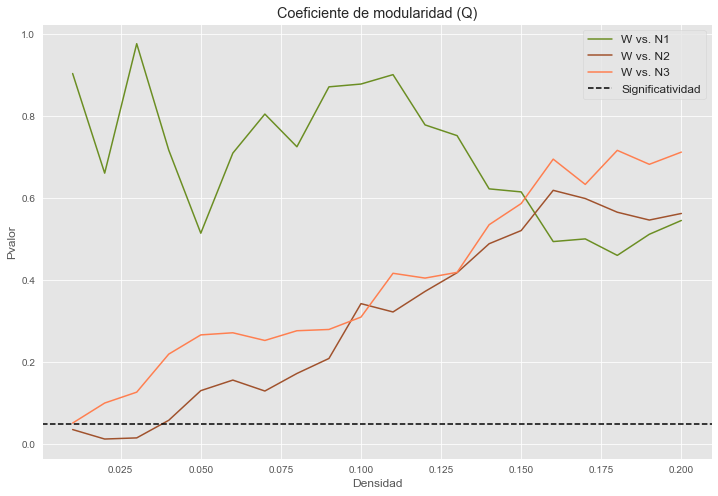

In [316]:
# Gráfico para Q
plt.figure(figsize=(12,8))

fig, ax = plt.subplots()
sns.lineplot(x="Densidad", y="Pvalor", data = pvalor_Q_wn1, color="olivedrab", label = "W vs. N1")
sns.lineplot(x="Densidad", y="Pvalor", data = pvalor_Q_wn2, color="sienna", label = "W vs. N2")
sns.lineplot(x="Densidad", y="Pvalor", data = pvalor_Q_wn3, color="coral", label = "W vs. N3")
ax.axhline(0.05, ls='--',color = "black", label = "Significatividad")
plt.title('Coeficiente de modularidad (Q)')
ax.legend(loc = "upper right", fontsize='large')

<Figure size 864x576 with 0 Axes>

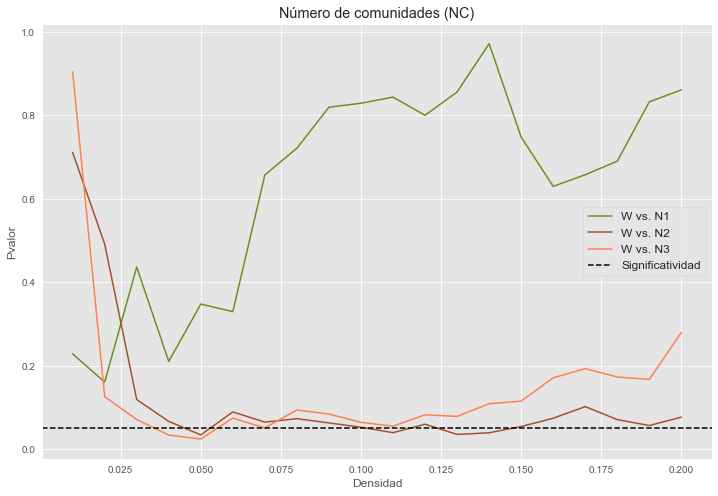

In [317]:
# Gráfico para NC
plt.figure(figsize=(12,8))

fig, ax = plt.subplots()
sns.lineplot(x="Densidad", y="Pvalor", data = pvalor_NC_wn1, color="olivedrab", label = "W vs. N1")
sns.lineplot(x="Densidad", y="Pvalor", data = pvalor_NC_wn2, color="sienna", label = "W vs. N2")
sns.lineplot(x="Densidad", y="Pvalor", data = pvalor_NC_wn3, color="coral", label = "W vs. N3")
ax.axhline(0.05, ls='--',color = "black", label = "Significatividad")
plt.title('Número de comunidades (NC)')
ax.legend(loc = "center right", fontsize='large')

## Tarea 3.1: Corrección por comparaciones múltiples

En cada caso discuta si resulta necesario corregir por comparaciones múltiples y cómo lo haría. De ser necesario, implementar una corrección adecuada.

In [236]:
import statsmodels.stats.multitest as smm

In [237]:
# P-valores corregidos para Q
# Se corrige el p-valor con FDR y se agrega al dataset
fdr_Q_wn1 = smm.multipletests(pvalor_Q_wn1["Pvalor"], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
pvalor_Q_wn1["FDR"] = fdr_Q_wn1

fdr_Q_wn2 = smm.multipletests(pvalor_Q_wn2["Pvalor"], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
pvalor_Q_wn2["FDR"] = fdr_Q_wn2

fdr_Q_wn3 = smm.multipletests(pvalor_Q_wn3["Pvalor"], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
pvalor_Q_wn3["FDR"] = fdr_Q_wn3

# P-valores corregidos para NC
# Se corrige el p-valor con FDR y se agrega al dataset
fdr_NC_wn1 = smm.multipletests(pvalor_NC_wn1["Pvalor"], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
pvalor_NC_wn1["FDR"] = fdr_NC_wn1

fdr_NC_wn2 = smm.multipletests(pvalor_NC_wn2["Pvalor"], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
pvalor_NC_wn2["FDR"] = fdr_NC_wn2

fdr_NC_wn3 = smm.multipletests(pvalor_NC_wn3["Pvalor"], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
pvalor_NC_wn3["FDR"] = fdr_NC_wn3

<Figure size 864x576 with 0 Axes>

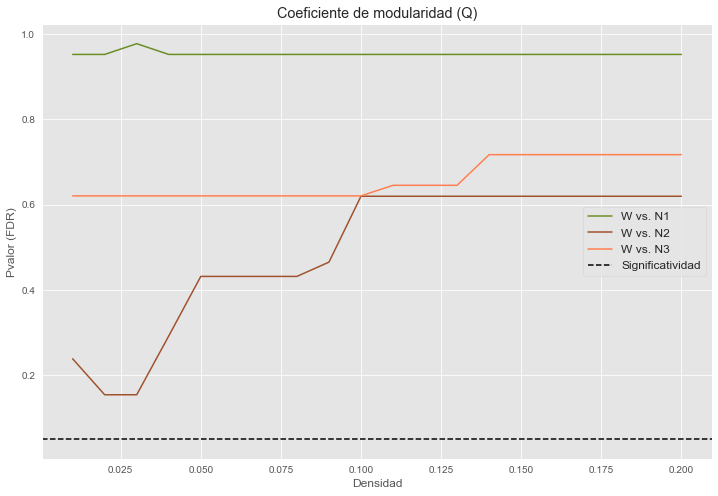

In [330]:
# Gráfico corregido para Q
plt.figure(figsize=(12,8))

fig, ax = plt.subplots()
sns.lineplot(x="Densidad", y="FDR", data = pvalor_Q_wn1, color="olivedrab", label = "W vs. N1")
sns.lineplot(x="Densidad", y="FDR", data = pvalor_Q_wn2, color="sienna", label = "W vs. N2")
sns.lineplot(x="Densidad", y="FDR", data = pvalor_Q_wn3, color="coral", label = "W vs. N3")
ax.axhline(0.05, ls='--',color = "black", label = "Significatividad")
ax.set(xlabel='Densidad', ylabel='Pvalor (FDR)')
plt.title('Coeficiente de modularidad (Q)')
ax.legend(loc = "center right", fontsize='large')

<Figure size 864x576 with 0 Axes>

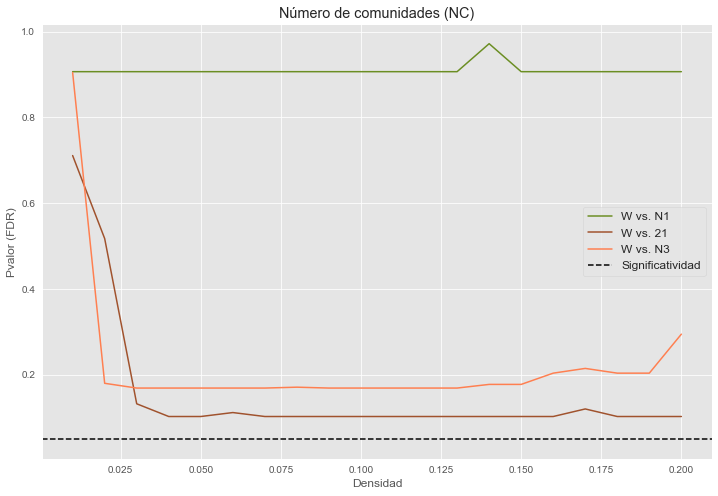

In [331]:
# Gráfico para NC
plt.figure(figsize=(12,8))

fig, ax = plt.subplots()
sns.lineplot(x="Densidad", y="FDR", data = pvalor_NC_wn1, color="olivedrab", label = "W vs. N1")
sns.lineplot(x="Densidad", y="FDR", data = pvalor_NC_wn2, color="sienna", label = "W vs. 21")
sns.lineplot(x="Densidad", y="FDR", data = pvalor_NC_wn3, color="coral", label = "W vs. N3")
ax.axhline(0.05, ls='--',color = "black", label = "Significatividad")
ax.set(xlabel='Densidad', ylabel='Pvalor (FDR)')
plt.title('Número de comunidades (NC)')
ax.legend(loc = "center right", fontsize='large')

## Tarea 3.2: Corrección por comparaciones múltiples

Repetir el procedimiento sobre las medidas de centralidad, grado, camino mínimo, y coeficiente de clustering ¿Cómo interpretaría estos resultados a la luz de los obtenidos para la modularidad?

In [243]:
# Esta función toma la lista de archivos (csv) y las densidades y genera un dataframe con 
# Nodo, Centralidad, Grado y Clustering para cada csv (Estadio_sujeto)
def Subject2graphAgain(files, densities):
    data0 = pd.DataFrame(columns=["nodo","Densidad","centralidad","grado","clustering","Sujeto","Estadio"]) # un dataset vacio para ir concatenando
    
    for i in files: # para cada sujeto en la lista del estadio
        df = pd.read_csv(i, header=None) # carga del dataset
        n = df.shape[0] # el tamaño
        df -= np.diag(np.ones(n)) # borra los 1 de la diagonal
        Gs = matrix2graphslist(df, densities) # genera un grafo por cada densidad

        suj = int(i.split(".")[0].split("\\")[1].split("suj")[1]) # el número de sujeto
        estadio = i.split(".")[0].split("\\")[1].split("_")[0] # el estadio
        
        for j,k in zip(Gs,densities):
            # La centralidad de cada nodo como df
            cent = pd.DataFrame.from_dict(nx.degree_centrality(j), orient="index", columns = ["centralidad"]).rename_axis('nodo').reset_index()
            # El grado de cada nodo como df
            deg = pd.DataFrame(j.degree, columns = ["nodo","grado"])
            # El coeficiente de clustering de cada nodo como df
            clus = pd.DataFrame.from_dict(nx.clustering(j), orient="index", columns = ["clustering"]).rename_axis('nodo').reset_index()
            # Merge de todo
            data = cent.merge(deg).merge(clus)
            # Se agrega Sujeto y Estadio para identificar
            data["Sujeto"] = suj
            data["Estadio"] = estadio
            data["Densidad"] = k
            data0 = data0.append(data)
            
    return(data0)

In [244]:
# Tiene que devolver un dataframe con 41760 registros (18 sujetos x 20 densidades x 116 nodos)
data_w = Subject2graphAgain(files_w, densities)
data_n1 = Subject2graphAgain(files_n1, densities)
data_n2 = Subject2graphAgain(files_n2, densities)
data_n3 = Subject2graphAgain(files_n3, densities)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


### Comparaciones

In [245]:
# P-valores para centralidad
pvalor_cen_wn1 = Ttest(data_w, data_n1, densities, "centralidad", 0.05)
pvalor_cen_wn2 = Ttest(data_w, data_n2, densities, "centralidad", 0.05)
pvalor_cen_wn3 = Ttest(data_w, data_n3, densities, "centralidad", 0.05)

# P-valores para clustering
pvalor_clus_wn1 = Ttest(data_w, data_n1, densities, "clustering", 0.05)
pvalor_clus_wn2 = Ttest(data_w, data_n2, densities, "clustering", 0.05)
pvalor_clus_wn3 = Ttest(data_w, data_n3, densities, "clustering", 0.05)

# P-valores para grado
pvalor_grado_wn1 = Ttest(data_w, data_n1, densities, "grado", 0.05)
pvalor_grado_wn2 = Ttest(data_w, data_n2, densities, "grado", 0.05)
pvalor_grado_wn3 = Ttest(data_w, data_n3, densities, "grado", 0.05)

<Figure size 864x576 with 0 Axes>

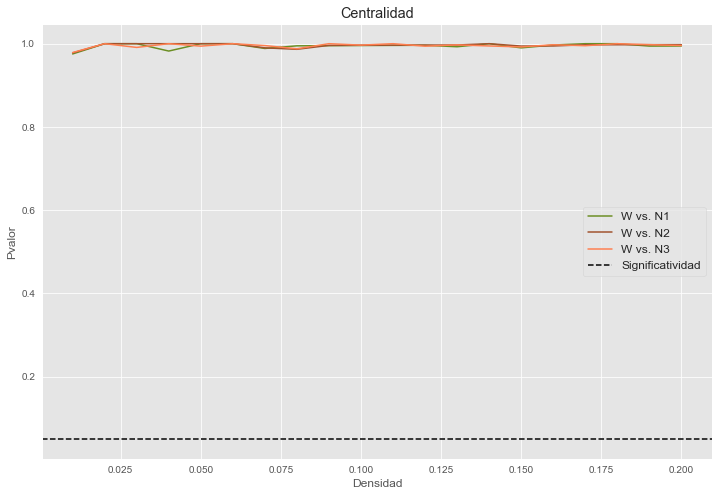

In [320]:
# Gráfico para centralidad
plt.figure(figsize=(12,8))

fig, ax = plt.subplots()
sns.lineplot(x="Densidad", y="Pvalor", data = pvalor_cen_wn1, color="olivedrab", label = "W vs. N1")
sns.lineplot(x="Densidad", y="Pvalor", data = pvalor_cen_wn2, color="sienna", label = "W vs. N2")
sns.lineplot(x="Densidad", y="Pvalor", data = pvalor_cen_wn3, color="coral", label = "W vs. N3")
ax.axhline(0.05, ls='--',color = "black", label = "Significatividad")
plt.title('Centralidad')
ax.legend(loc = "center right", fontsize='large')

<Figure size 864x576 with 0 Axes>

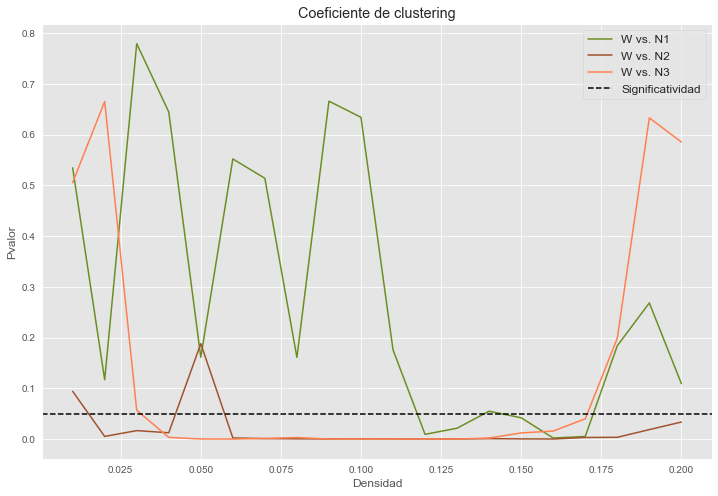

In [321]:
# Gráfico para coeficiente de clustering
plt.figure(figsize=(12,8))

fig, ax = plt.subplots()
sns.lineplot(x="Densidad", y="Pvalor", data = pvalor_clus_wn1, color="olivedrab", label = "W vs. N1")
sns.lineplot(x="Densidad", y="Pvalor", data = pvalor_clus_wn2, color="sienna", label = "W vs. N2")
sns.lineplot(x="Densidad", y="Pvalor", data = pvalor_clus_wn3, color="coral", label = "W vs. N3")
ax.axhline(0.05, ls='--',color = "black", label = "Significatividad")
plt.title('Coeficiente de clustering')
ax.legend(loc = "upper right", fontsize='large')

<Figure size 864x576 with 0 Axes>

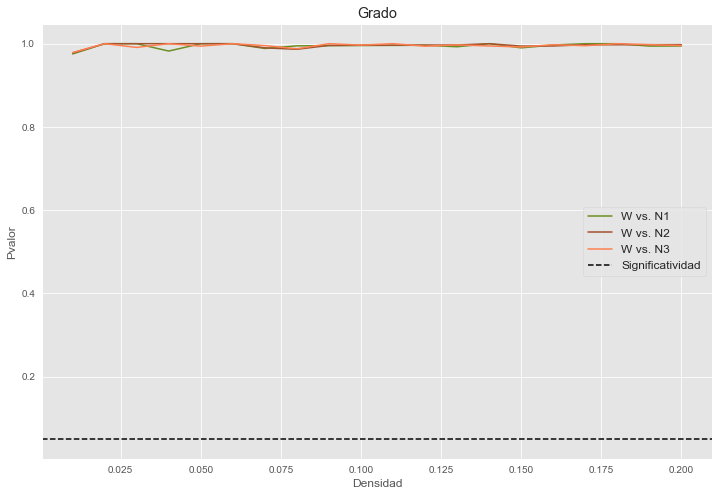

In [322]:
# Gráfico para grado
plt.figure(figsize=(12,8))

fig, ax = plt.subplots()
sns.lineplot(x="Densidad", y="Pvalor", data = pvalor_grado_wn1, color="olivedrab", label = "W vs. N1")
sns.lineplot(x="Densidad", y="Pvalor", data = pvalor_grado_wn2, color="sienna", label = "W vs. N2")
sns.lineplot(x="Densidad", y="Pvalor", data = pvalor_grado_wn3, color="coral", label = "W vs. N3")
ax.axhline(0.05, ls='--',color = "black", label = "Significatividad")
plt.title('Grado')
ax.legend(loc = "center right", fontsize='large')

### Correcciones

In [249]:
# P-valores corregidos para centralidad
# Se corrige el p-valor con FDR y se agrega al dataset
fdr_cen_wn1 = smm.multipletests(pvalor_cen_wn1["Pvalor"], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
pvalor_cen_wn1["FDR"] = fdr_cen_wn1

fdr_cen_wn2 = smm.multipletests(pvalor_cen_wn2["Pvalor"], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
pvalor_cen_wn2["FDR"] = fdr_cen_wn2

fdr_cen_wn3 = smm.multipletests(pvalor_cen_wn3["Pvalor"], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
pvalor_cen_wn3["FDR"] = fdr_cen_wn3

# P-valores corregidos para clustering
# Se corrige el p-valor con FDR y se agrega al dataset
fdr_clus_wn1 = smm.multipletests(pvalor_clus_wn1["Pvalor"], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
pvalor_clus_wn1["FDR"] = fdr_clus_wn1

fdr_clus_wn2 = smm.multipletests(pvalor_clus_wn2["Pvalor"], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
pvalor_clus_wn2["FDR"] = fdr_clus_wn2

fdr_clus_wn3 = smm.multipletests(pvalor_clus_wn3["Pvalor"], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
pvalor_clus_wn3["FDR"] = fdr_clus_wn3

# P-valores corregidos para grado
# Se corrige el p-valor con FDR y se agrega al dataset
fdr_grado_wn1 = smm.multipletests(pvalor_grado_wn1["Pvalor"], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
pvalor_grado_wn1["FDR"] = fdr_grado_wn1

fdr_grado_wn2 = smm.multipletests(pvalor_grado_wn2["Pvalor"], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
pvalor_grado_wn2["FDR"] = fdr_grado_wn2

fdr_grado_wn3 = smm.multipletests(pvalor_grado_wn3["Pvalor"], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)[1]
pvalor_grado_wn3["FDR"] = fdr_grado_wn3

<Figure size 864x576 with 0 Axes>

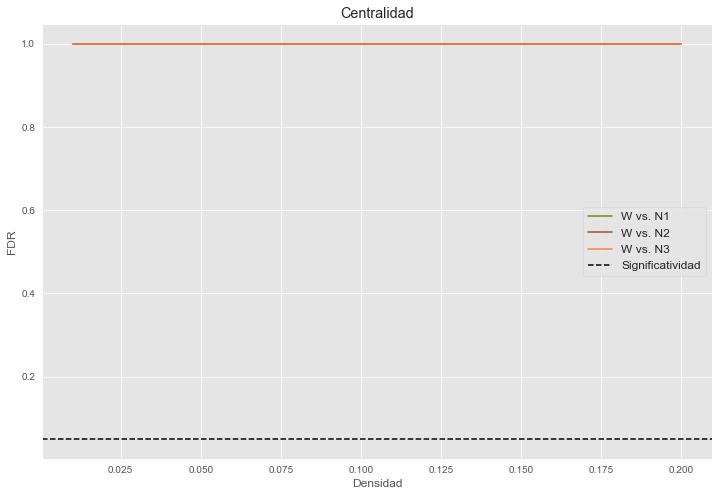

In [323]:
# Gráfico corregido para centralidad
plt.figure(figsize=(12,8))

fig, ax = plt.subplots()
sns.lineplot(x="Densidad", y="FDR", data = pvalor_cen_wn1, color="olivedrab", label = "W vs. N1")
sns.lineplot(x="Densidad", y="FDR", data = pvalor_cen_wn2, color="sienna", label = "W vs. N2")
sns.lineplot(x="Densidad", y="FDR", data = pvalor_cen_wn3, color="coral", label = "W vs. N3")
ax.axhline(0.05, ls='--',color = "black", label = "Significatividad")
plt.title('Centralidad')
ax.legend(loc = "center right", fontsize='large')

<Figure size 864x576 with 0 Axes>

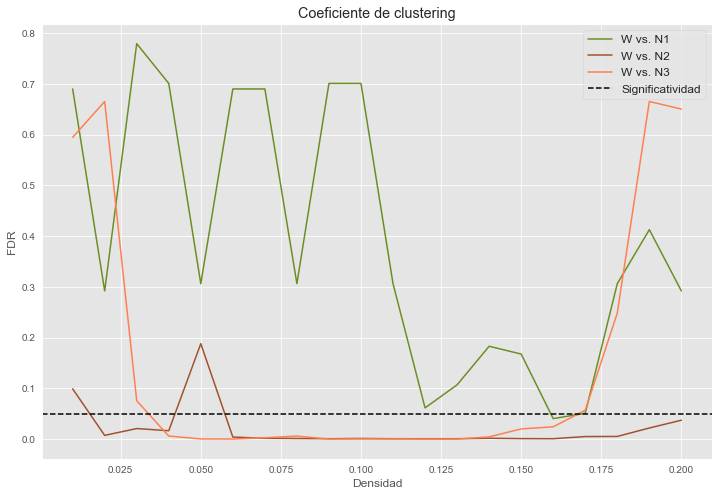

In [324]:
# Gráfico corregido para clustering
plt.figure(figsize=(12,8))

fig, ax = plt.subplots()
sns.lineplot(x="Densidad", y="FDR", data = pvalor_clus_wn1, color="olivedrab", label = "W vs. N1")
sns.lineplot(x="Densidad", y="FDR", data = pvalor_clus_wn2, color="sienna", label = "W vs. N2")
sns.lineplot(x="Densidad", y="FDR", data = pvalor_clus_wn3, color="coral", label = "W vs. N3")
ax.axhline(0.05, ls='--',color = "black", label = "Significatividad")
plt.title('Coeficiente de clustering')
ax.legend(loc = "upper right", fontsize='large')

<Figure size 864x576 with 0 Axes>

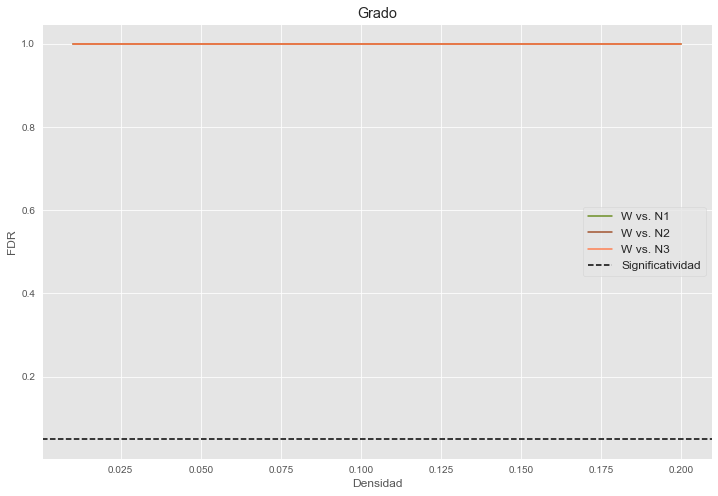

In [325]:
# Gráfico corregido para grado
plt.figure(figsize=(12,8))

fig, ax = plt.subplots()
sns.lineplot(x="Densidad", y="FDR", data = pvalor_grado_wn1, color="olivedrab", label = "W vs. N1")
sns.lineplot(x="Densidad", y="FDR", data = pvalor_grado_wn2, color="sienna", label = "W vs. N2")
sns.lineplot(x="Densidad", y="FDR", data = pvalor_grado_wn3, color="coral", label = "W vs. N3")
ax.axhline(0.05, ls='--',color = "black", label = "Significatividad")
plt.title('Grado')
ax.legend(loc = "center right", fontsize='large')

# Tarea 4: Diferencias en la membresía para los diferentes estadíos

Para identificar diferencias significativas globales en la membresía de los nodos entre los distintos estadíos del sueño (N1, N2 y N3), con el estadio despierto (W ) se propone seguir el procedimiento propuesto por Alexander-Bloch y colaboradores [Alexander-Bloch et al., 2012]. Se quiere saber si las comunidades encontradas en un estadio de sueño NX y las encontradas en el cerebro despierto W son similares.<br>
<br>
**1.** Se toman para todos los pares de sujetos en NX el Índice de Rand ajustado (adjusted for-chance Rand index).<br>
**2.** Se toman para todos los pares de sujetos en W el Índice de Rand ajustado (adjusted for-chance Rand index).<br>
**3.** Se promedian y se obtiene el Índice de Rand ajustado "within-group" observado (RIo). Se lo graficar junto al error estandar de la media.<br>
**4.** Se aleatorizan las etiquetas de los parece NX-W de forma que siempre esten todos los sujetos en cada grupo pero con las etiquetas cambiadas, y se repiten los pasos 1-3 de forma de obtener un Índice de Rand ajustado "within-group" permutado (RIp). Este paso se repite Np veces generando una distribución empirica de valores de valores RIp.<br>
**5.** El p-valor se calcula como la cantidad de permutaciones que dieron RIp > RIo divido Np.<br>

In [26]:
from sklearn.metrics.cluster import adjusted_rand_score
import itertools
import datetime

In [ ]:
# Esta función toma una matriz y una densidad y devuelve el grafo
def matrix2graph(correlation_matrix, density):

    n = correlation_matrix.shape[0] # la cantidad de registros/columnas (es cuadrada)
    max_links = (n*n-n)//2 # máxima cantidad de links
    tril_idx = np.tril_indices(n,-1) # conserva la mitad de la matirz
    sorted_correlations = sorted(correlation_matrix.values[tril_idx].flatten(),reverse=True) # la pasa a una dimensión y la ordena 
    idx = int(density*max_links) # índice
    threshold = sorted_correlations[idx] # el umbral
    Gs = nx.from_pandas_adjacency(correlation_matrix >= threshold) # agrega a la lista

    return Gs # la devuelve

In [ ]:
# Esta función arma una lista con los 18 grafos, también devuelve un df con la identificacion del sujeto
def ArmadoRedes(files, density):
    Gs_sujetos = []
    filename_list = []
    for i in files: # para cada sujeto en la lista del estadio
        filename = i.split("\\")[1].split(".")[0] # el nombre del archivo
        filename_list.append(filename)
        
        df = pd.read_csv(i, header=None) # carga del dataset
        n = df.shape[0] # el tamaño
        df -= np.diag(np.ones(n)) # borra los 1 de la diagonal
        Gs = matrix2graph(df, density) # genera el grafo
        Gs_sujetos.append(Gs)
    
    Gs_df = pd.DataFrame({"Grafo": Gs_sujetos, "File": filename_list})       
    return(Gs_sujetos, Gs_df)

In [23]:
# Esta función arma la lista de ARI de todas las permutaciones entre los 18 sujetos (mejor partición con Louvain)
def RandIndex(graph_list):
    
    partitions = []
    for i in graph_list:
        best = community.best_partition(i, random_state=55)
        best_value = list(best.values())
        partitions.append(best_value)
        
    permutaciones = list(itertools.permutations(partitions,2)) # Lista con todas las permutaciones posibles de 2 elementos

    ARI_list = [] # lista vacía para ir almacenando los ARI
    for j in permutaciones: # para cada permutación (es una lista de 2 elementos)
        ARI = adjusted_rand_score(j[0], j[1]) # calcula el ARI
        ARI_list.append(ARI) # lo almacena en la lista

    return(ARI_list)

In [24]:
# Esta función mezcla las etiquetas y calcula los RIp
def Shuffle(redes1, redes2, Np):  # Np es la cantidad de veces que se realiza

    df = pd.DataFrame({"L":redes1, "R": redes2}) # Se genera un dataframe con cada lista de grafos como columna
    RIp_list = [] # aquí se almacenarán los RIp de uno

    for k in list(range(Np)): # para cada i en una lista de enteros
        
        np.random.seed(k) # la semilla para randit
        df["Random"] = np.random.randint(0, 2, df.shape[0]) # se agrega una variable "Random" con el valor 0 ó 1 al azar
        df[['L','R']] = df[['L','R']].mask( df['Random'] == 1, df[['R','L']].values) # se intercamban los grafos de Random = 1
        
        RIp_L = np.mean(RandIndex(df["L"])) # se calcula el promedio de W
        RIp_R = np.mean(RandIndex(df["R"])) # Se calcula el promedio de Nx
        RIp = np.mean([RIp_L, RIp_R]) # se promedian ambos
        RIp_list.append(RIp) # se agrega a la lista

    return(RIp_list)

In [25]:
# Esta función hace todo en uno, utilizando las anteriores
    # Genera las redes de cada estadio_sujeto
    # Calcula los ARI (RIo)
    # Mezcla las etiquetas y calcula (RIp)
    # Devuelve un dataframe con los datos de densidad, RIo y RIp para graficar el histograma
    
def ARI(files_estadio1, files_estadio2, Np, densities):
    
    data_ARI = pd.DataFrame(columns = ["RIp","RIo","Densidad"]) # dataset vacío para ir concatenando
    
    for l in densities:
        print("Inicio densidad = " + str(l))
        redes_estadio1, redes1_df = ArmadoRedes(files_estadio1, 0.1)
        redes_estadio2, redes2_df = ArmadoRedes(files_estadio2, 0.1)
        print("fin función ArmadoRedes")
        
        rand_w = RandIndex(redes_estadio1) # el rand index de todas las permutaciones de W
        rand_nx = RandIndex(redes_estadio2) # el rand index de todas las permutaciones de Nx
        print("fin función RandIndex")        
        
        rand_w_avg = np.mean(rand_w) # el promedio de todos los ARI de W
        rand_nx_avg = np.mean(rand_nx) # el promedio de todos los ARI de nx
        
        RIo_wnx = np.mean([rand_w_avg, rand_nx_avg]) # el promedio de ambos etadios
        RIp_wnx = Shuffle(redes_estadio1, redes_estadio2, Np) # aquí se mezclan las etiquetas y se recalcula ARI
        print("fin función Shuffle")  
        
        # Se genera el dataframe de salida
        data = pd.DataFrame(RIp_wnx, columns = ["RIp"])
        data["RIo"] = RIo_wnx
        data["Densidad"] = l
        data_ARI = data_ARI.append(data)
    
    return(data_ARI)      

In [ ]:
"""ARI_wn1 = ARI(files_w, files_n1, 100, densities)
ARI_wn1.to_csv(r'.\\ARI_wn1.csv')"""

In [ ]:
"""ARI_wn2 = ARI(files_w, files_n2, 100, densities)
ARI_wn2.to_csv(r'.\\ARI_wn2.csv')"""

In [ ]:
"""ARI_wn3 = ARI(files_w, files_n3, 100, densities)
ARI_wn3.to_csv(r'.\\ARI_wn3.csv')"""

## W vs. N1

In [349]:
# Carga del dataset
ARI_wn1_obs = pd.read_csv('.\\ARI_wn1_obs.csv', usecols = ["Densidad", "Observado", "PValor"])
ARI_wn1_per = pd.read_csv('.\\ARI_wn1_per.csv', usecols = ["Densidad", "Permutado", "Error"])

In [402]:
# Se agrega una columna para indicar si el test dio significativo con nivel 0.05
ARI_wn1_obs.loc[ARI_wn1_obs['PValor'] < 0.05, 'Significativo'] = 0.2
# Se agrega el desvio standar que no lo tenía (esto es una truchada, pero ya fue)
ARI_wn1_obs["Error"] = ARI_wn1_per["Error"]

In [403]:
ARI_wn1_obs

,Densidad,Observado,PValor,Significativo,Error
0,0.01,0.372832,0.51,NaN,0.006611
1,0.02,0.350045,0.41,NaN,0.005978
2,0.03,0.341660,0.56,NaN,0.006037
3,0.04,0.330917,0.85,NaN,0.005136
4,0.05,0.315405,0.94,NaN,0.006060
5,0.06,0.306661,0.97,NaN,0.005385
6,0.07,0.292411,0.99,NaN,0.005359
7,0.08,0.277804,0.99,NaN,0.004753
8,0.09,0.274629,0.99,NaN,0.005505
9,0.10,0.276451,0.91,NaN,0.005432


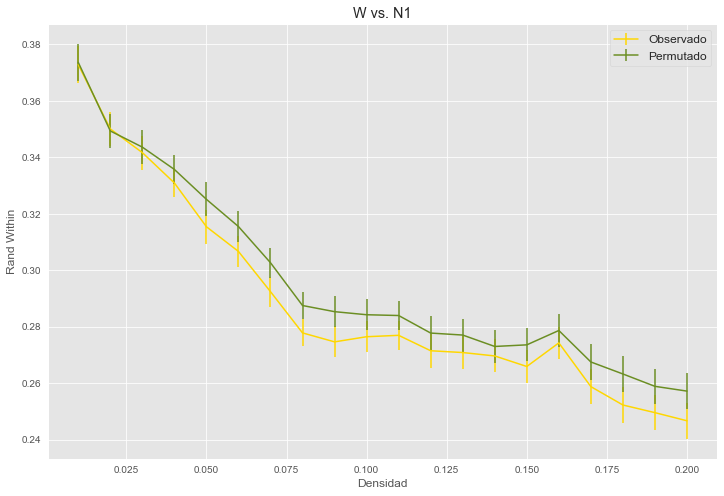

In [409]:
fig, ax = plt.subplots()

ax.errorbar(x="Densidad", y="Observado", data = ARI_wn1_obs, yerr="Error", color="gold")
ax.errorbar(x="Densidad", y="Permutado", data = ARI_wn1_per, yerr="Error", color="olivedrab")
ax.set(xlabel='Densidad', ylabel='Rand Within')
plt.title('W vs. N1')
ax.legend(loc = "upper right", fontsize='large')

## W vs. N2

In [256]:
# Carga del dataset
ARI_wn2_obs = pd.read_csv('.\\ARI_wn2_obs.csv', usecols = ["Densidad", "Observado", "PValor"])
ARI_wn2_per = pd.read_csv('.\\ARI_wn2_per.csv', usecols = ["Densidad", "Permutado", "Error"])

In [405]:
# Se agrega una columna para indicar si el test dio significativo con nivel 0.05
ARI_wn2_obs.loc[ARI_wn2_obs['PValor'] < 0.05, 'Significativo'] = 0.2
# Se agrega el desvio standar que no lo tenía (esto es una truchada, pero ya fue)
ARI_wn2_obs["Error"] = ARI_wn2_per["Error"]

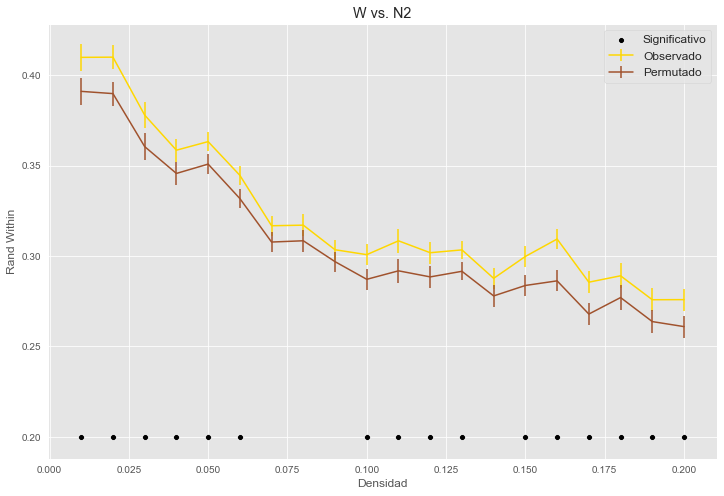

In [406]:
fig, ax = plt.subplots()

ax.errorbar(x="Densidad", y="Observado", data = ARI_wn2_obs, yerr="Error", color="gold")
ax.errorbar(x="Densidad", y="Permutado", data = ARI_wn2_per, yerr="Error", color="sienna")
sns.scatterplot(x="Densidad", y="Significativo", data = ARI_wn2_obs, color="black", label = "Significativo")
ax.set(xlabel='Densidad', ylabel='Rand Within')
plt.title('W vs. N2')
ax.legend(loc = "upper right", fontsize='large')

## W vs. N3

In [358]:
# Carga del dataset
ARI_wn3_obs = pd.read_csv('.\\ARI_wn3_obs.csv', usecols = ["Densidad", "Observado", "PValor"])
ARI_wn3_per = pd.read_csv('.\\ARI_wn3_per.csv', usecols = ["Densidad", "Permutado", "Error"])

In [407]:
# Se agrega una columna para indicar si el test dio significativo con nivel 0.05
ARI_wn3_obs.loc[ARI_wn3_obs['PValor'] < 0.05, 'Significativo'] = 0.2
# Se agrega el desvio standar que no lo tenía (esto es una truchada, pero ya fue)
ARI_wn3_obs["Error"] = ARI_wn3_per["Error"]

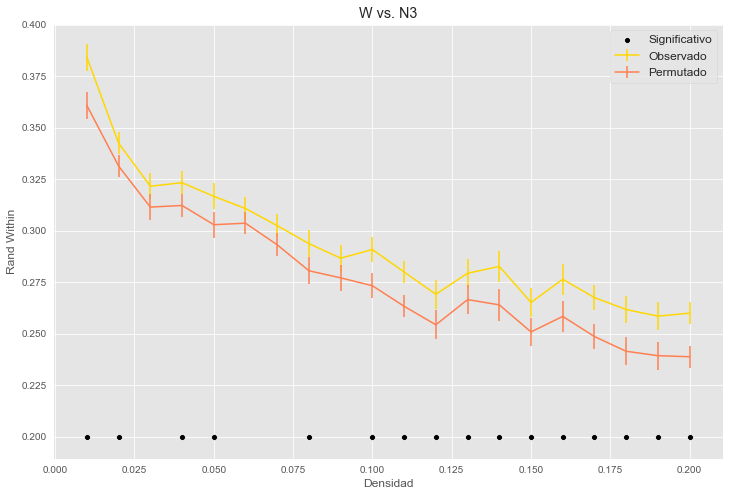

In [408]:
fig, ax = plt.subplots()

ax.errorbar(x="Densidad", y="Observado", data = ARI_wn3_obs, yerr="Error", color="gold")
ax.errorbar(x="Densidad", y="Permutado", data = ARI_wn3_per,yerr="Error", color="coral")
sns.scatterplot(x="Densidad", y="Significativo", data = ARI_wn3_obs, color="black", label = "Significativo")
ax.set(xlabel='Densidad', ylabel='Rand Within')
plt.title('W vs. N3')
ax.legend(loc = "upper right", fontsize='large')

# Tarea 5: Rol de nodos, y cambios en el rol de los nodos

Finalmente, se busca definir los roles que cumple cada nodo dentro de las comunidades, e identificar cuales son los nodos que, o bien están cambiando de comunidad o bien están cambiando de rol. Se deberán clasificar los nodos para cada estadío según el coeficiente de participación ($P_{i}$) y el z-score del grado intra-comunidad ($z_{i}$),<br>
<br>
$$z_{i} = \frac{k_{i} - <k>}{\sigma_{k}}$$
<br>
donde $k{i}$ es el grado intra-comunidad, y $< k >$ y $\sigma_{k}$ son el promedio y el desvío estándar del grado intra-modular.<br>
<br>
$$P_{i} = \sum_{j}^{N_{M}} {\left (\frac{k_{i}^{U_{j}}}{k_{i}}\right )}^2$$
<br>
donde $k_{i}^{U_{j}}$ es el número de aristas en el nodo $i$ y la comunidad $j$, $N_{M}$ es el número de comunidades, y $k_{i}$ es el grado total del nodo $i$. Esto se realizará siguiendo los criterios propuestos en Tagliazucchi y colaboradores (2013) [Tagliazucchi et al., 2013]:<br>
<br>
**Hubs:** $P_{i}$ > $P_{C}$ & $z{i}$ > $z_{C}$<br>
**Provincial Hubs:** $P_{i}$ < $P_{C}$ & $z{i}$ > $z_{C}$<br>
**Provincial Nodes:** $P_{i}$ < $P_{C}$ & $z{i}$ < $z_{C}$<br>
**Connector Nodes:** $P_{i}$ > $P_{C}$ & $z{i}$ < $z_{C}$<br>
<br>
en principio, para los umbrales propuestos ($P_{C}$ y $z_{C}$) en el mismo trabajo. Graficar el número de nodos por cada clase en función de δ, y comparar estadísticamente cada estadio N1, N2 y N3, con el estadio despierto W.<br>
Para un valor de δ que resulte particularmente interesante a partir de los análisis anteriores, visualizar el grafo coloreando la membresía de cada nodo y su rol. Identificar en este
grafo cuáles son los nodos que cambian entre los distintos estadíos del sueño.

## Tarea 5.1: Criterios para definir los roles

Revisar los criterios definidos por Tagliazucchi y colaboradores (2013) a partir de los histogramas del coeficiente de participación
($P_{i}$) y del z-score del grado intra-comunidad ($z_{i}$).

## Tarea 5.2: Visualizaciones

Usar el archivo *aal_extended.csv* para generar visualizaciones coloreando por regiones anatómicas y hemisferios. ¿Qué puede concluir a partir de las diferencias entre agrupamientos funcionales y anatómicos para los diferentes estadíos del sueño?

In [7]:
roles = pd.read_csv("roles_join.csv")
roles["seccion"] = roles.index
roles = roles.drop("X1", axis=1)
roles

,rol_N1,rol_N2,rol_N3,rol_W,nombre,codigo,region,lobulo,seccion
0,CN,CN,PN,CN,Precentral_L,2001,Central,L,0
1,CN,CN,CN,CN,Precentral_R,2002,Central,R,1
2,CN,H,CN,CN,Frontal_Sup_L,2101,Frontal,L,2
3,CN,H,CN,CN,Frontal_Sup_R,2102,Frontal,R,3
4,PN,PN,PN,PN,Frontal_Sup_Orb_L,2111,Frontal,L,4
...,...,...,...,...,...,...,...,...,...
111,CN,H,CN,PN,Vermis_6,9130,Cerebelum,--,111
112,PN,H,CN,PN,Vermis_7,9140,Cerebelum,--,112
113,PN,PH,CN,PN,Vermis_8,9150,Cerebelum,--,113
114,PN,PH,PN,PN,Vermis_9,9160,Cerebelum,--,114


Text(0.5, 1.0, 'N3 - Región anatómica del cerebro')

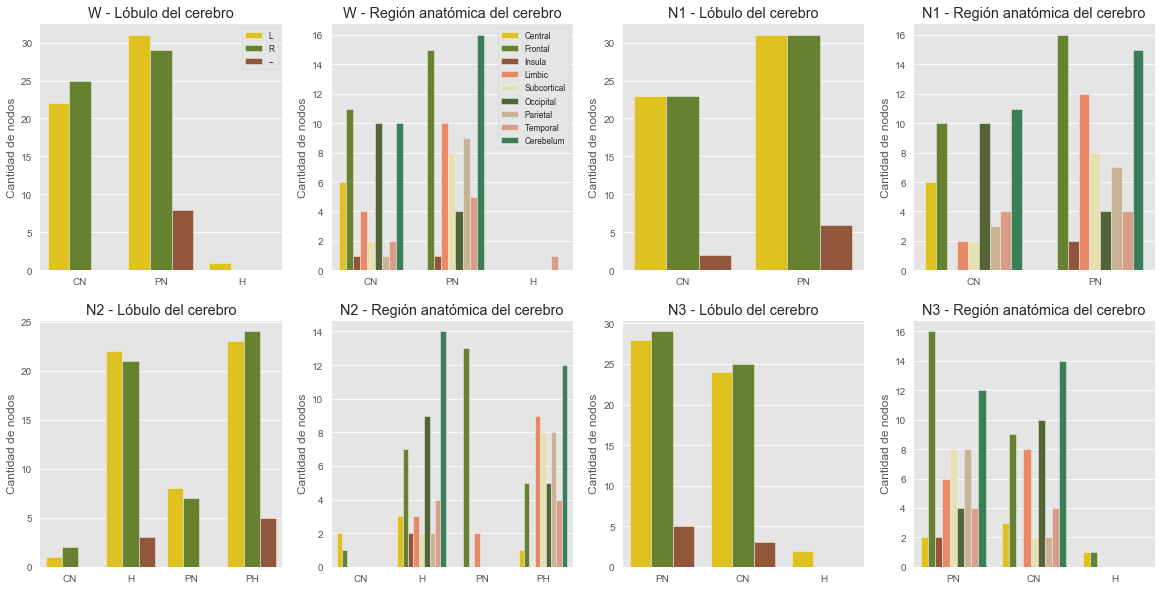

In [89]:
# Paletas
pal1 = ["gold","olivedrab","sienna","coral"]
pal2 = ["gold","olivedrab","sienna","coral", "palegoldenrod","darkolivegreen","tan","darksalmon", "seagreen"]
# Grilla
mpl.rcParams['figure.figsize'] = (20,10)
fig, axes = plt.subplots(2,4)

# W
ax1 = sns.countplot(x="rol_W", hue = "lobulo", data=roles, ax = axes[0,0], palette = pal1)
ax1.legend(loc = "upper right", fontsize='small')
ax1.set(ylabel='Cantidad de nodos', xlabel="")
axes[0,0].set_title("W - Lóbulo del cerebro")

ax2 = sns.countplot(x="rol_W", hue = "region", data=roles, ax = axes[0,1], palette = pal2)
ax2.legend(loc = "upper right", fontsize='small')
ax2.set(ylabel='Cantidad de nodos', xlabel="")
axes[0,1].set_title("W - Región anatómica del cerebro")

# N1
ax3 = sns.countplot(x="rol_N1", hue = "lobulo", data=roles, ax = axes[0,2], palette = pal1)
ax3.legend().remove()
ax3.set(ylabel='Cantidad de nodos', xlabel="")
axes[0,2].set_title("N1 - Lóbulo del cerebro")

ax4 = sns.countplot(x="rol_N1", hue = "region", data=roles, ax = axes[0,3], palette = pal2)
ax4.legend().remove()
ax4.set(ylabel='Cantidad de nodos', xlabel="")
axes[0,3].set_title("N1 - Región anatómica del cerebro")

# N2
ax5 = sns.countplot(x="rol_N2", hue = "lobulo", data=roles, ax = axes[1,0], palette = pal1)
ax5.legend().remove()
ax5.set(ylabel='Cantidad de nodos', xlabel="")
axes[1,0].set_title("N2 - Lóbulo del cerebro")

ax6 = sns.countplot(x="rol_N2", hue = "region", data=roles, ax = axes[1,1], palette = pal2)
ax6.legend().remove()
ax6.set(ylabel='Cantidad de nodos', xlabel="")
axes[1,1].set_title("N2 - Región anatómica del cerebro")

# N3
ax7 = sns.countplot(x="rol_N3", hue = "lobulo", data=roles, ax = axes[1,2], palette = pal1)
ax7.legend().remove()
ax7.set(ylabel='Cantidad de nodos', xlabel="")
axes[1,2].set_title("N3 - Lóbulo del cerebro")

ax8 = sns.countplot(x="rol_N3", hue = "region", data=roles, ax = axes[1,3], palette = pal2)
ax8.legend().remove()
ax8.set(ylabel='Cantidad de nodos', xlabel="")
axes[1,3].set_title("N3 - Región anatómica del cerebro")